### **Gucci Second-Hand Market Analysis: A Strategic Plan**

**Project Goal:** To analyze the `vestiaire.csv` dataset to understand the key drivers of sales performance on the second-hand market and provide actionable strategic recommendations to Gucci stakeholders for optimizing pricing, inventory, and seller management.

---

### **Part 1: Data Loading and Initial Preparation**

This foundational step ensures the data is accurate, consistent, and ready for analysis. Errors or inconsistencies at this stage can lead to flawed conclusions.

**1.1. Data Loading:**
*   Load the dataset from `data/vestiaire.csv` into a pandas DataFrame.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image
import os

# Note: This notebook requires the 'kaleido' package for exporting plotly images.
# You can install it using: pip install kaleido

# Load the data
df = pd.read_csv('data/vestiaire.csv')


**1.2. Initial Inspection & Profiling:**
*   **Understand Dimensions:** Use `df.shape` to see the number of rows (products) and columns (features).
*   **Review Data Types and Nulls:** Use `df.info()` to get a summary of all columns, their data types (`Dtype`), and the count of non-null values. This is the first step in identifying missing data.
*   **Statistical Summary:** Use `df.describe()` for all numerical columns to understand their distribution, including mean, median (50%), standard deviation, and min/max values. This helps spot anomalies or potential outliers early (e.g., a price of $0).
*   **Preview Data:** Use `df.head()` to view the first few rows and get a feel for the data in each column.

In [2]:
print('DataFrame Dimensions:')
print(df.shape)

DataFrame Dimensions:
(900514, 36)


In [3]:
print('DataFrame Info:')
df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900514 entries, 0 to 900513
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  900514 non-null  int64  
 1   product_type                900514 non-null  object 
 2   product_name                900514 non-null  object 
 3   product_description         900507 non-null  object 
 4   product_keywords            899331 non-null  object 
 5   product_gender_target       900514 non-null  object 
 6   product_category            899331 non-null  object 
 7   product_season              900512 non-null  object 
 8   product_condition           900514 non-null  object 
 9   product_like_count          900514 non-null  float64
 10  sold                        900514 non-null  bool   
 11  reserved                    900514 non-null  bool   
 12  available                   900514 non-null  bool   
 13

In [4]:
print('Statistical Summary of Numerical Columns:')
df.describe()

Statistical Summary of Numerical Columns:


,product_id,product_like_count,brand_id,price_usd,seller_price,seller_earning,buyers_fees,seller_id,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
count,9.005140e+05,900514.000000,900514.000000,900514.000000,900514.000000,900514.000000,886778.000000,9.005140e+05,900514.000000,900514.000000,9.005140e+05,9.005140e+05,900514.000000
mean,3.810003e+07,6.298326,2437.277576,386.862536,331.639409,290.436463,55.486152,1.382227e+07,664.958267,1497.663143,5.623160e+04,9.904618e+03,72.461753
std,7.749403e+06,12.920079,3702.869580,1859.559156,1591.472807,1498.157606,290.259974,7.535593e+06,3552.744596,5460.166852,1.438156e+05,3.557486e+05,34.428663
min,1.113630e+05,0.000000,2.000000,6.130000,5.110000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,-180.000000
25%,3.811580e+07,1.000000,66.000000,83.070000,71.360000,58.580000,11.720000,7.977389e+06,6.000000,10.000000,0.000000e+00,1.700000e+01,68.000000
50%,4.174207e+07,3.000000,341.000000,168.700000,143.780000,125.370000,23.970000,1.438324e+07,34.000000,52.000000,0.000000e+00,7.300000e+01,88.000000
75%,4.267775e+07,7.000000,3266.000000,350.000000,298.200000,261.900000,50.480000,1.946235e+07,178.000000,373.000000,2.539300e+04,2.900000e+02,95.000000
max,4.324884e+07,3154.000000,18237.000000,632610.000000,527175.000000,509229.750000,105435.000000,2.608177e+07,79738.000000,39628.000000,1.064736e+06,1.417912e+07,100.000000


In [5]:
print('First 5 Rows of the DataFrame:')
df.head()

First 5 Rows of the DataFrame:


,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,Tourcoing,25775970,vitalii25775970,NaN,Germany,3.0,14.0,0.0,13.0,0.0
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,Tourcoing,13698770,olivia13698770,NaN,Belgium,0.0,0.0,0.0,8.0,0.0
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,...,Tourcoing,6042365,cecilia6042365,1-2 days,Spain,58.0,69.0,0.0,62.0,96.0
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.0,...,Brooklyn,13172949,gretchen13172949,1-2 days,United States,63.0,274.0,126346.0,131.0,96.0
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.0,...,Crawley,2578605,crunchykat,3-5 days,United Kingdom,19.0,14.0,102821.0,40.0,89.0


**1.3. Data Cleaning and Preprocessing:**
*   **Handling Missing Values:**
    *   Quantify missing data for each column using `df.isnull().sum()`.
    *   **Strategy for `product_description` and `product_keywords`:** If missing, fill with an empty string or a placeholder like 'not_specified'. These are text fields and can be handled this way.
    *   **Strategy for `product_condition`, `product_material`, `product_color`:** These are important categorical features. If the number of missing values is small, consider dropping the rows. If it's significant, impute with the mode (most frequent value) or create a new category called 'Unknown'.
    *   **Strategy for `seller_badge`:** This is a key indicator. Treat missing values as a separate category, e.g., 'No Badge'.
    *   **Strategy for `usually_ships_within`:** Impute missing values with the median or mode shipping time.

In [6]:
print('Count of Missing Values per Column:')
df.isnull().sum()

Count of Missing Values per Column:


product_id                         0
product_type                       0
product_name                       0
product_description                7
product_keywords                1183
product_gender_target              0
product_category                1183
product_season                     2
product_condition                  0
product_like_count                 0
sold                               0
reserved                           0
available                          0
in_stock                           0
should_be_gone                     0
brand_id                           0
brand_name                         0
brand_url                          0
product_material                   4
product_color                      1
price_usd                          0
seller_price                       0
seller_earning                     0
seller_badge                       0
has_cross_border_fees          13736
buyers_fees                    13736
warehouse_name                     0
s

In [8]:
df['product_description'].fillna('not_specified', inplace=True)
df['product_keywords'].fillna('not_specified', inplace=True)
df['product_category'].fillna('not_specified', inplace=True)

for col in ['product_condition', 'product_material', 'product_color']:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)
    
df['seller_badge'].fillna('No Badge', inplace=True)

mode_shipping = df['usually_ships_within'].mode()[0]
df['usually_ships_within'].fillna(mode_shipping, inplace=True)

print('Missing values after imputation:')
print(df.isnull().sum())

/var/folders/9r/_l7v_srn15z38xsssh084f4m0000gn/T/ipykernel_50017/3009039690.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['product_category'].fillna('not_specified', inplace=True)
/var/folders/9r/_l7v_srn15z38xsssh084f4m0000gn/T/ipykernel_50017/3009039690.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

Missing values after imputation:
product_id                        0
product_type                      0
product_name                      0
product_description               0
product_keywords                  0
product_gender_target             0
product_category                  0
product_season                    2
product_condition                 0
product_like_count                0
sold                              0
reserved                          0
available                         0
in_stock                          0
should_be_gone                    0
brand_id                          0
brand_name                        0
brand_url                         0
product_material                  0
product_color                     0
price_usd                         0
seller_price                      0
seller_earning                    0
seller_badge                      0
has_cross_border_fees         13736
buyers_fees                   13736
warehouse_name                 

*   **Correcting Data Types:**
    *   Ensure price columns (`price_usd`, `seller_price`, `seller_earning`) are converted to `float`.
    *   Ensure integer columns (`product_like_count`, `seller_products_sold`, etc.) are converted to `int`.
    *   The `sold` column is our primary target variable. Ensure it is a numerical `0` or `1` for easier calculations (e.g., `mean()` to get sell-through rate).

In [9]:
for col in ['price_usd', 'seller_price', 'seller_earning']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in ['product_like_count', 'seller_products_sold', 'seller_num_followers']:
    df[col] = df[col].astype('int')

df['sold'] = df['sold'].astype('int')

print('Data types after correction:')
df.info()

Data types after correction:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900514 entries, 0 to 900513
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  900514 non-null  int64  
 1   product_type                900514 non-null  object 
 2   product_name                900514 non-null  object 
 3   product_description         900514 non-null  object 
 4   product_keywords            900514 non-null  object 
 5   product_gender_target       900514 non-null  object 
 6   product_category            900514 non-null  object 
 7   product_season              900512 non-null  object 
 8   product_condition           900514 non-null  object 
 9   product_like_count          900514 non-null  int64  
 10  sold                        900514 non-null  int64  
 11  reserved                    900514 non-null  bool   
 12  available                   900514 non-null

*   **Handling Duplicates:**
    *   Check for and remove any duplicate rows based on `product_id` to ensure each product is represented only once. Use `df.duplicated(subset=['product_id']).sum()`.

In [10]:
print(f"Found {df.duplicated(subset=['product_id']).sum()} duplicate products based on 'product_id'.")
df.drop_duplicates(subset=['product_id'], keep='first', inplace=True)
print(f"Shape after dropping duplicates: {df.shape}")

Found 0 duplicate products based on 'product_id'.
Shape after dropping duplicates: (900514, 36)


*   **Outlier Treatment (for `price_usd`):**
    *   Visualize the price distribution using a box plot to identify extreme outliers.
    *   Calculate the Interquartile Range (IQR). Define outliers as values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.
    *   **Action:** Instead of removing outliers (which might be rare, expensive items), we will cap them at the 99th percentile to prevent them from skewing our analysis visualizations and averages, while still acknowledging their presence.

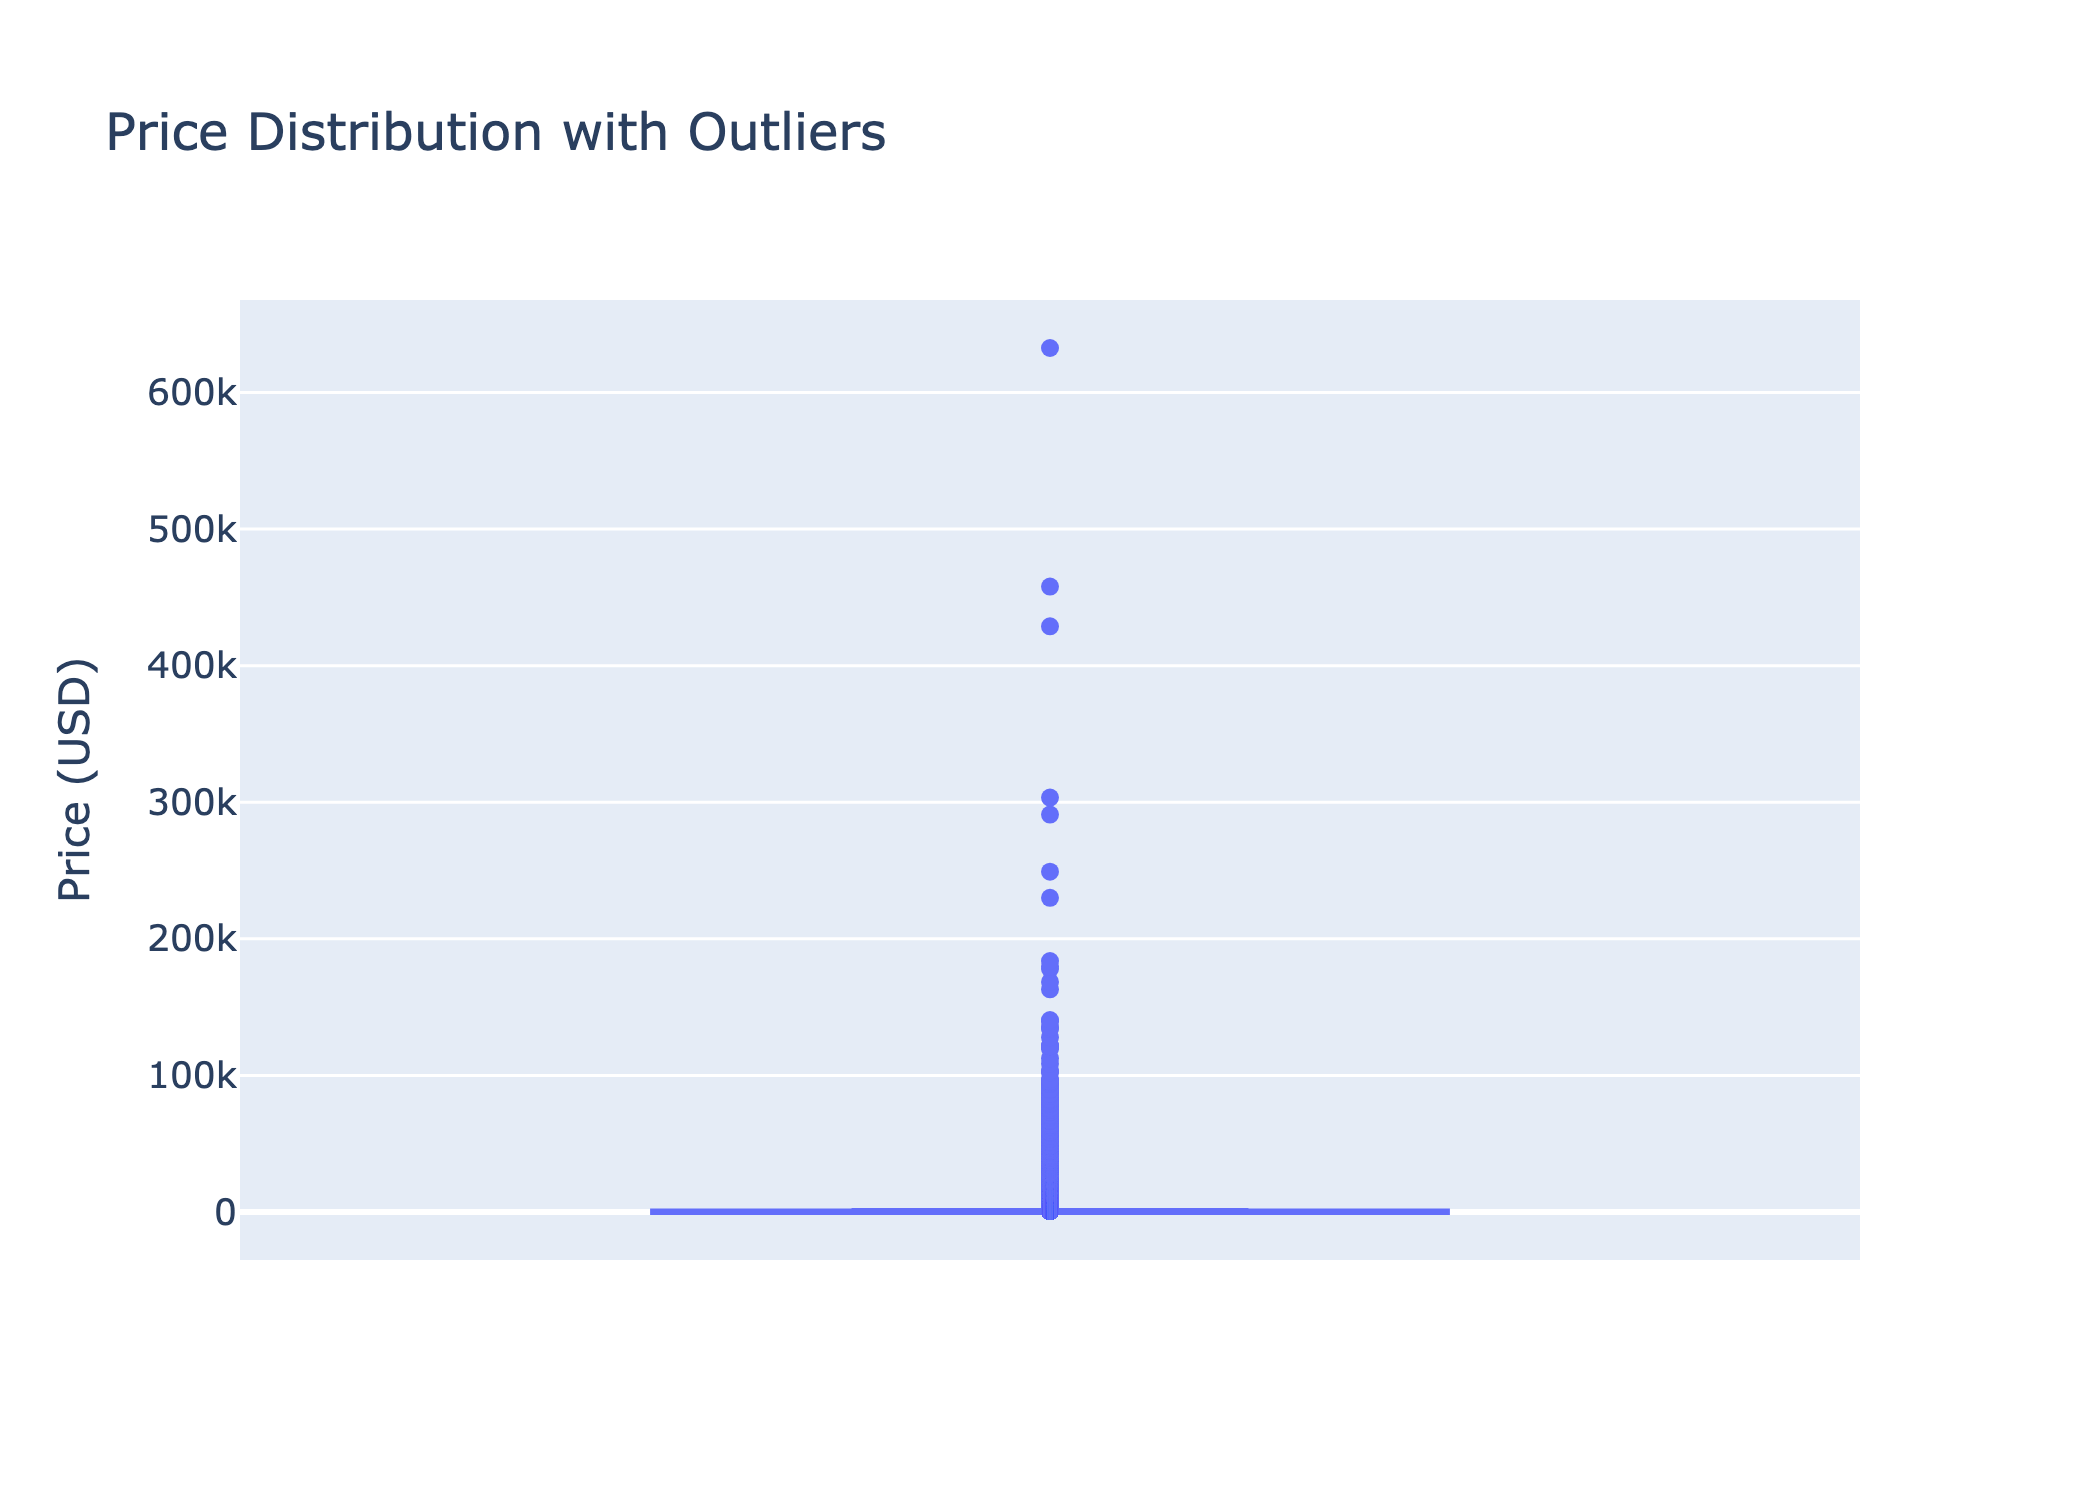

In [11]:
fig = px.box(df, y='price_usd', title='Price Distribution with Outliers')
fig.update_layout(yaxis_title='Price (USD)')

img_bytes = fig.to_image(format="png", scale=3)
Image(img_bytes)

Capping prices at the 99th percentile: $3,741.22


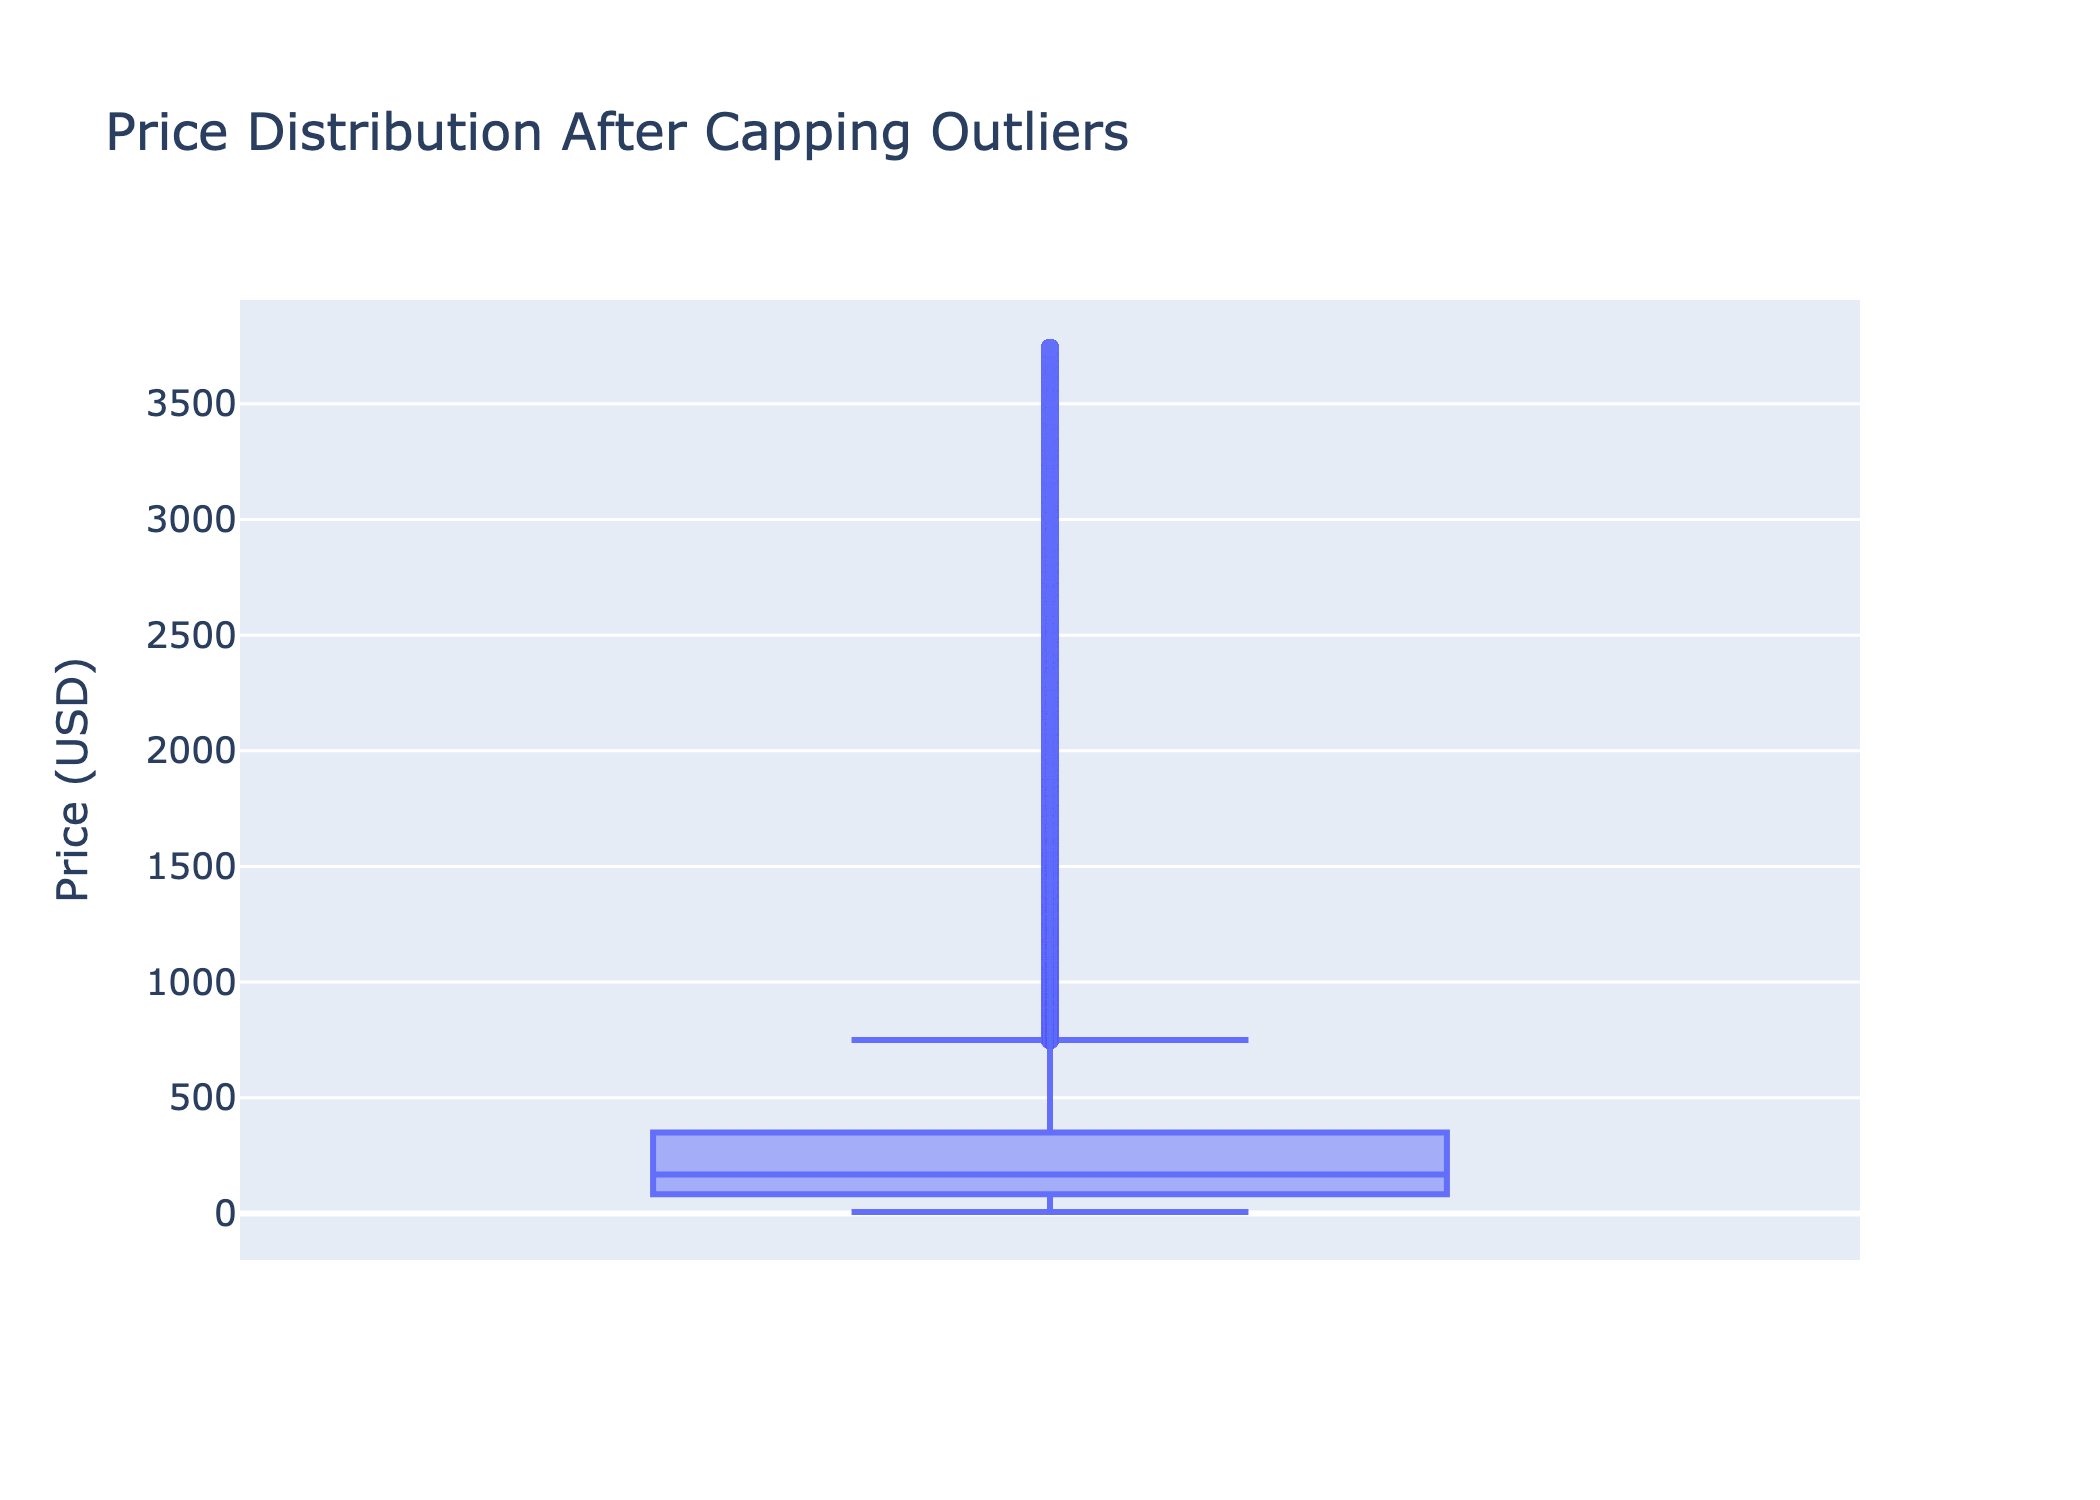

In [12]:
price_cap = df['price_usd'].quantile(0.99)
print(f"Capping prices at the 99th percentile: ${price_cap:,.2f}")
df['price_usd'] = np.where(df['price_usd'] > price_cap, price_cap, df['price_usd'])

fig = px.box(df, y='price_usd', title='Price Distribution After Capping Outliers')
fig.update_layout(yaxis_title='Price (USD)')

img_bytes = fig.to_image(format="png", scale=3)
Image(img_bytes)

*   **Save Cleaned Data:**
    *   Export the fully cleaned and preprocessed DataFrame to a new file named `cleaned_data.csv`. This file will be the single source of truth for the subsequent analysis.

In [13]:
df.to_csv('cleaned_data.csv', index=False)
print("Cleaned data saved to 'cleaned_data.csv'")

Cleaned data saved to 'cleaned_data.csv'


### **Part 2: Exploratory Data Analysis (EDA)**

This phase focuses on visualizing data and asking key questions to uncover patterns, trends, and relationships.

**2.1. Sales Performance Analysis:**
*   **Overall Sell-Through Rate:** Calculate the percentage of products marked as `sold`. This is our primary KPI.

In [14]:
sell_through_rate = df['sold'].mean()
print(f"Overall Sell-Through Rate: {sell_through_rate:.2%}")

Overall Sell-Through Rate: 1.53%


*   **Price Distribution:**
    *   Plot a histogram of `price_usd` to understand the most common price points.

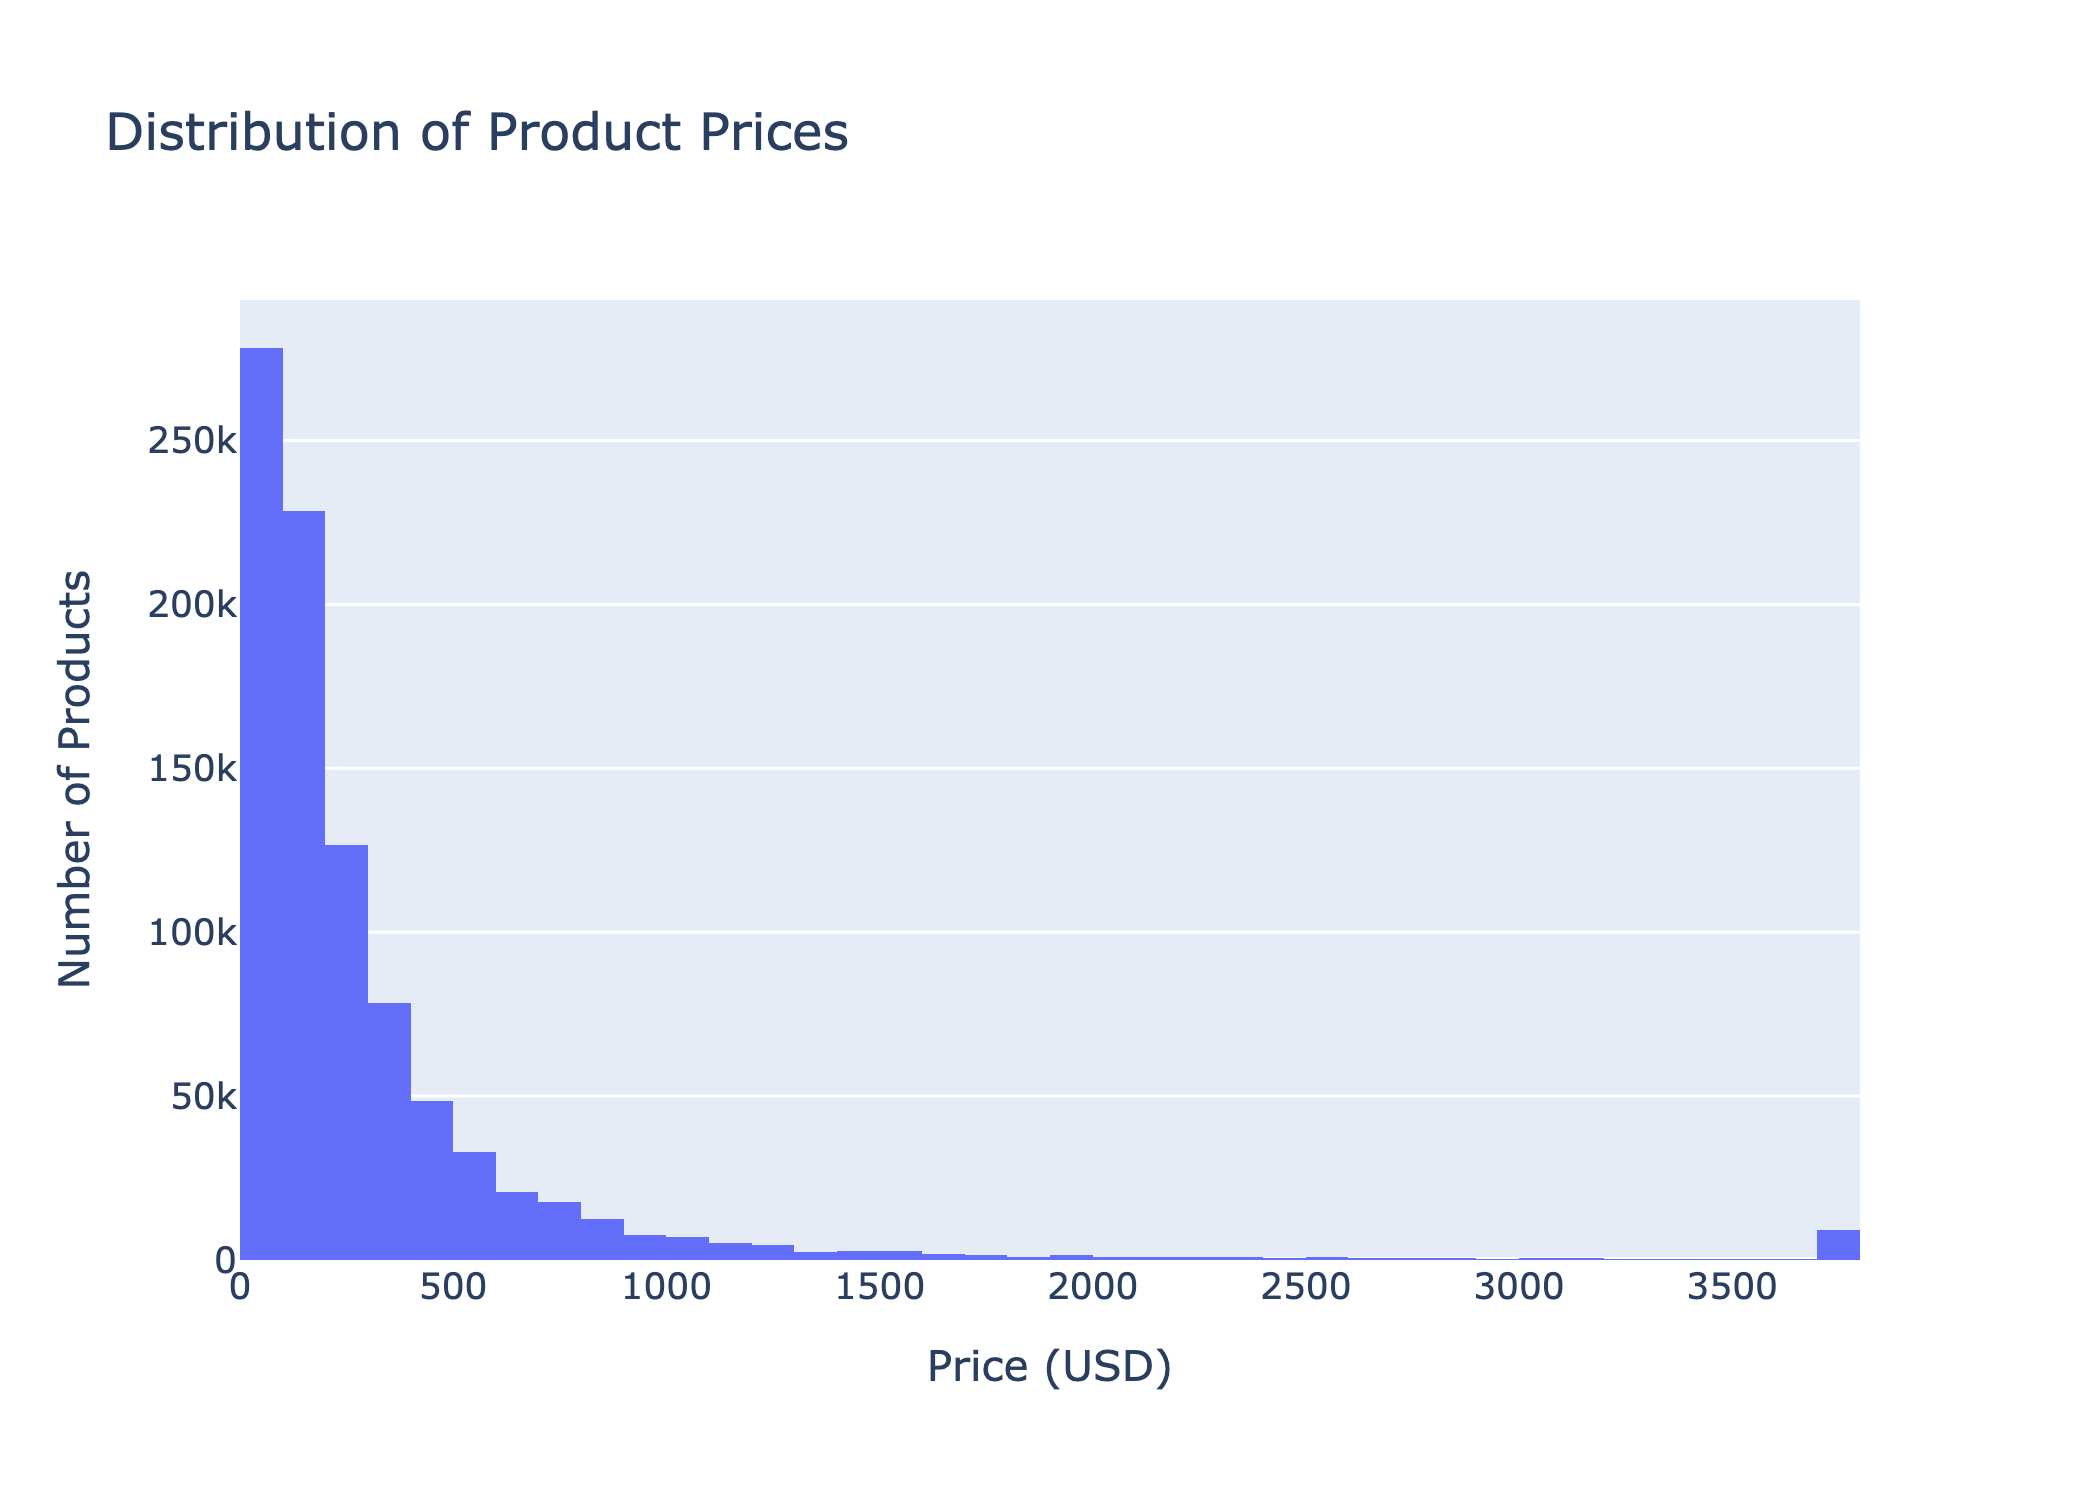

In [15]:
fig = px.histogram(df, x='price_usd', nbins=50, title='Distribution of Product Prices')
fig.update_layout(xaxis_title='Price (USD)', yaxis_title='Number of Products')

img_bytes = fig.to_image(format="png", scale=3)
Image(img_bytes)

*   Analyze the relationship between `price_usd` and sales. Bin prices into logical groups (e.g., <$500, $500-$1000, $1000-$2000, $2000+) and calculate the sell-through rate for each bin. Visualize this with a bar chart.

/var/folders/9r/_l7v_srn15z38xsssh084f4m0000gn/T/ipykernel_50017/923203120.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



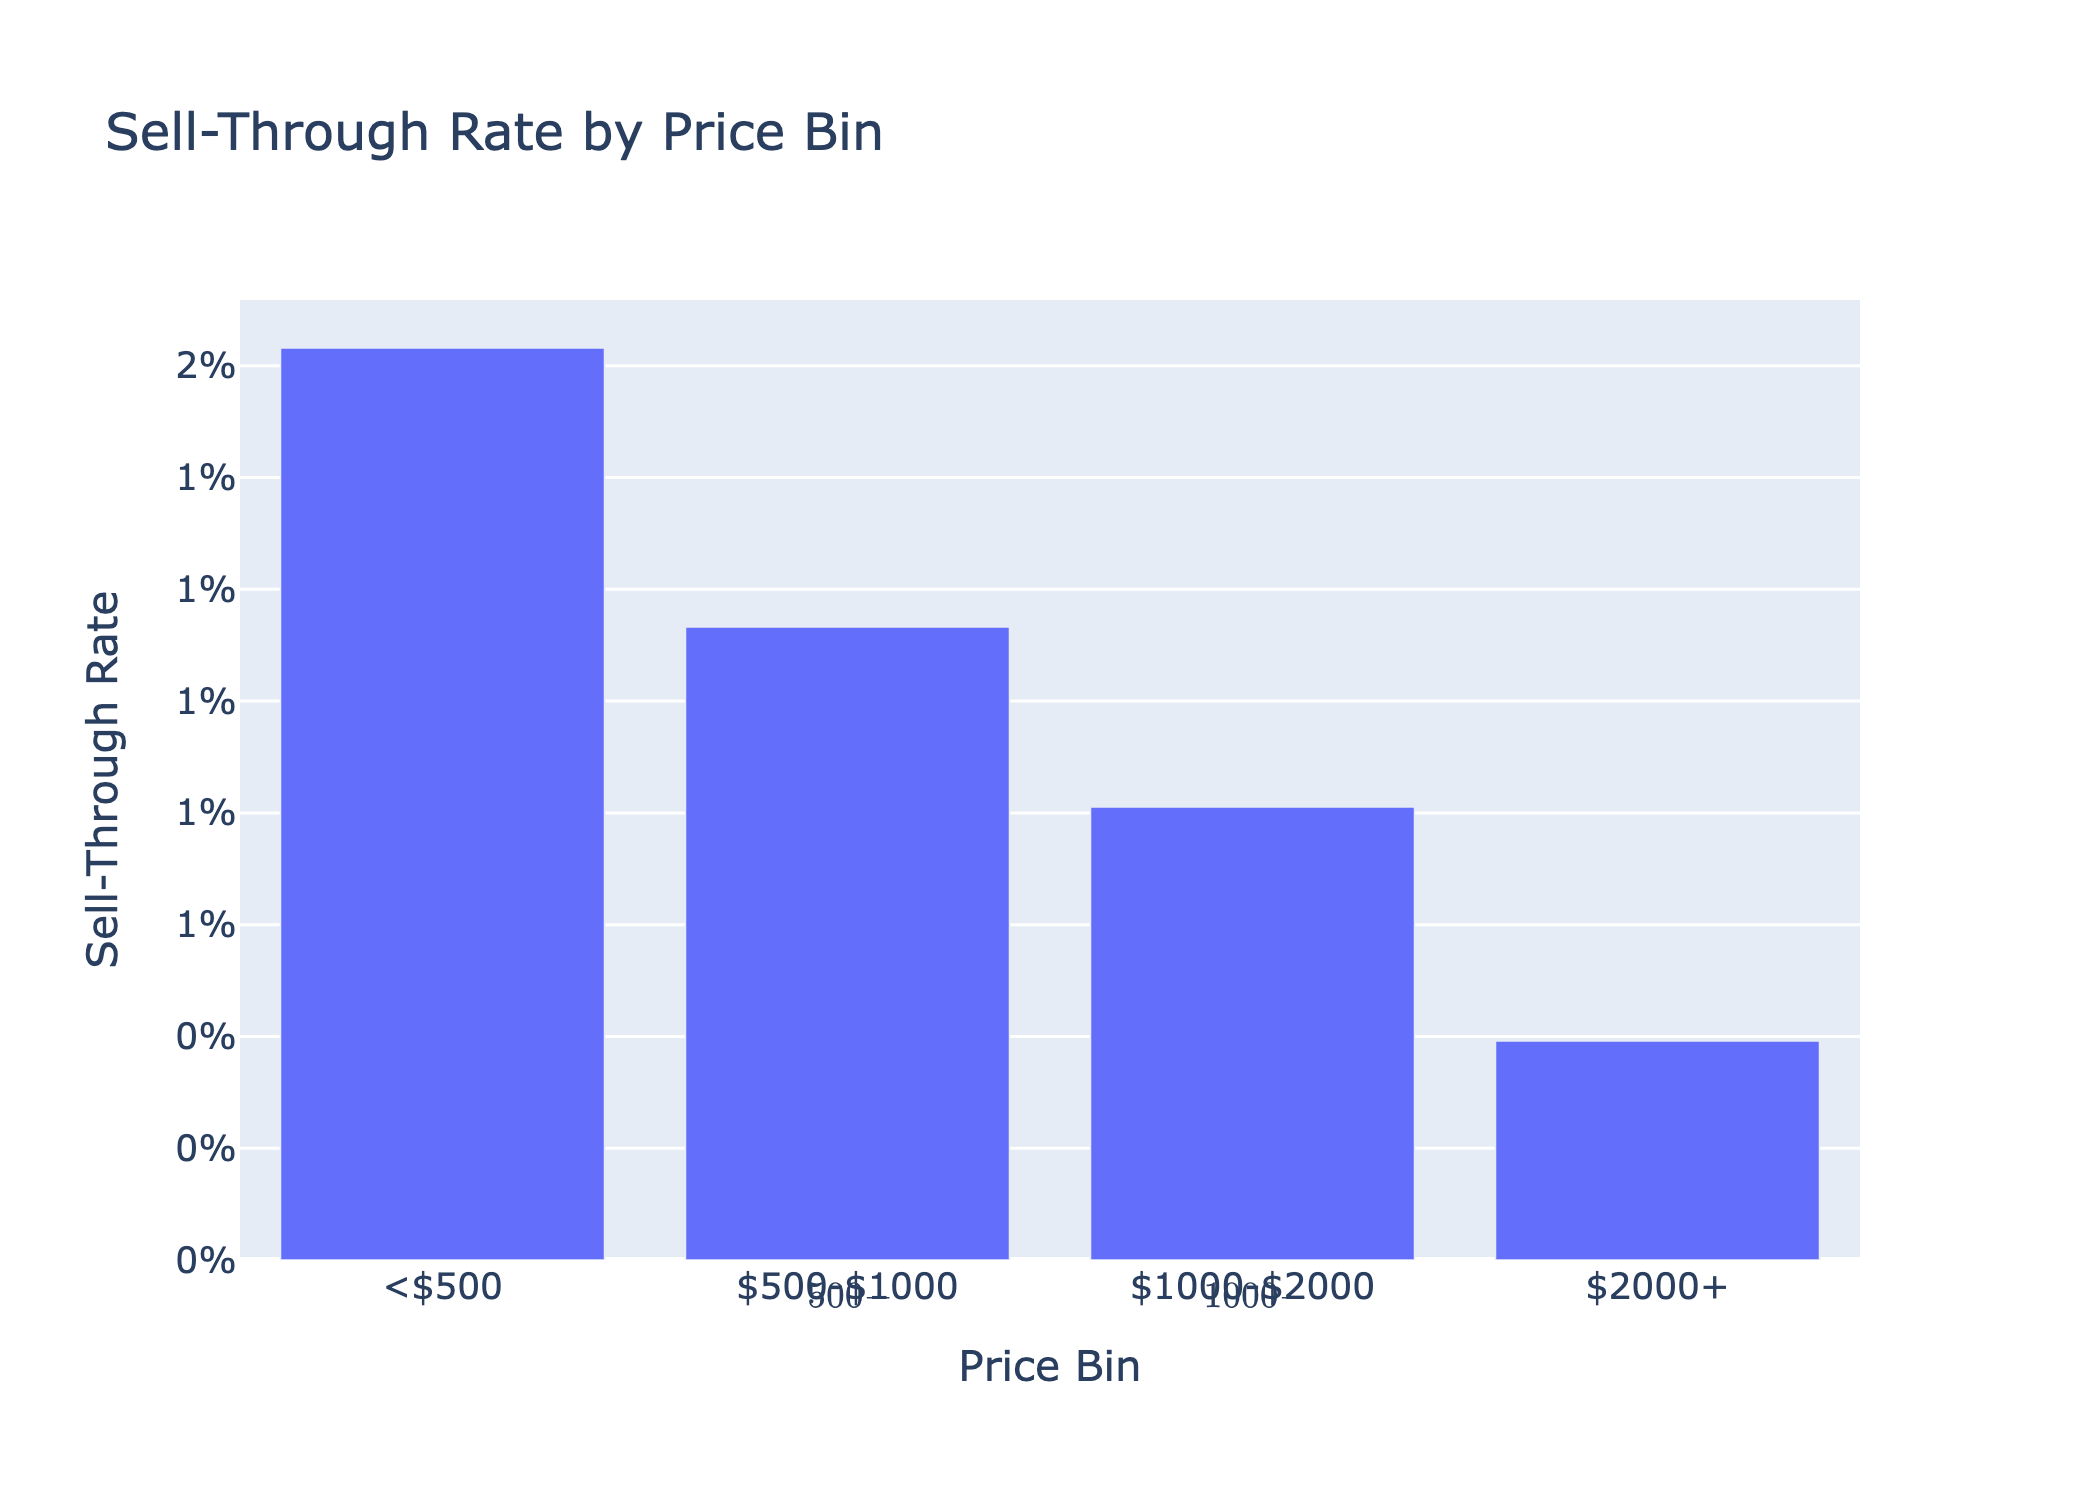

In [17]:
price_bins = [0, 500, 1000, 2000, df['price_usd'].max()]
price_labels = ['<$500', '$500-$1000', '$1000-$2000', '$2000+']
df['price_bin'] = pd.cut(df['price_usd'], bins=price_bins, labels=price_labels, right=False)

sell_through_by_price = df.groupby('price_bin')['sold'].mean().reset_index()

fig = px.bar(sell_through_by_price, x='price_bin', y='sold', 
             title='Sell-Through Rate by Price Bin', 
             labels={'price_bin': 'Price Bin', 'sold': 'Sell-Through Rate'})
fig.update_layout(yaxis_tickformat='.0%')

img_bytes = fig.to_image(format="png", scale=3)
Image(img_bytes)

**2.2. Product Attribute Analysis:**
*   **Top Performing Categories:**
    *   Create a bar chart of `product_category` and `product_type` counts to identify the most listed item types.

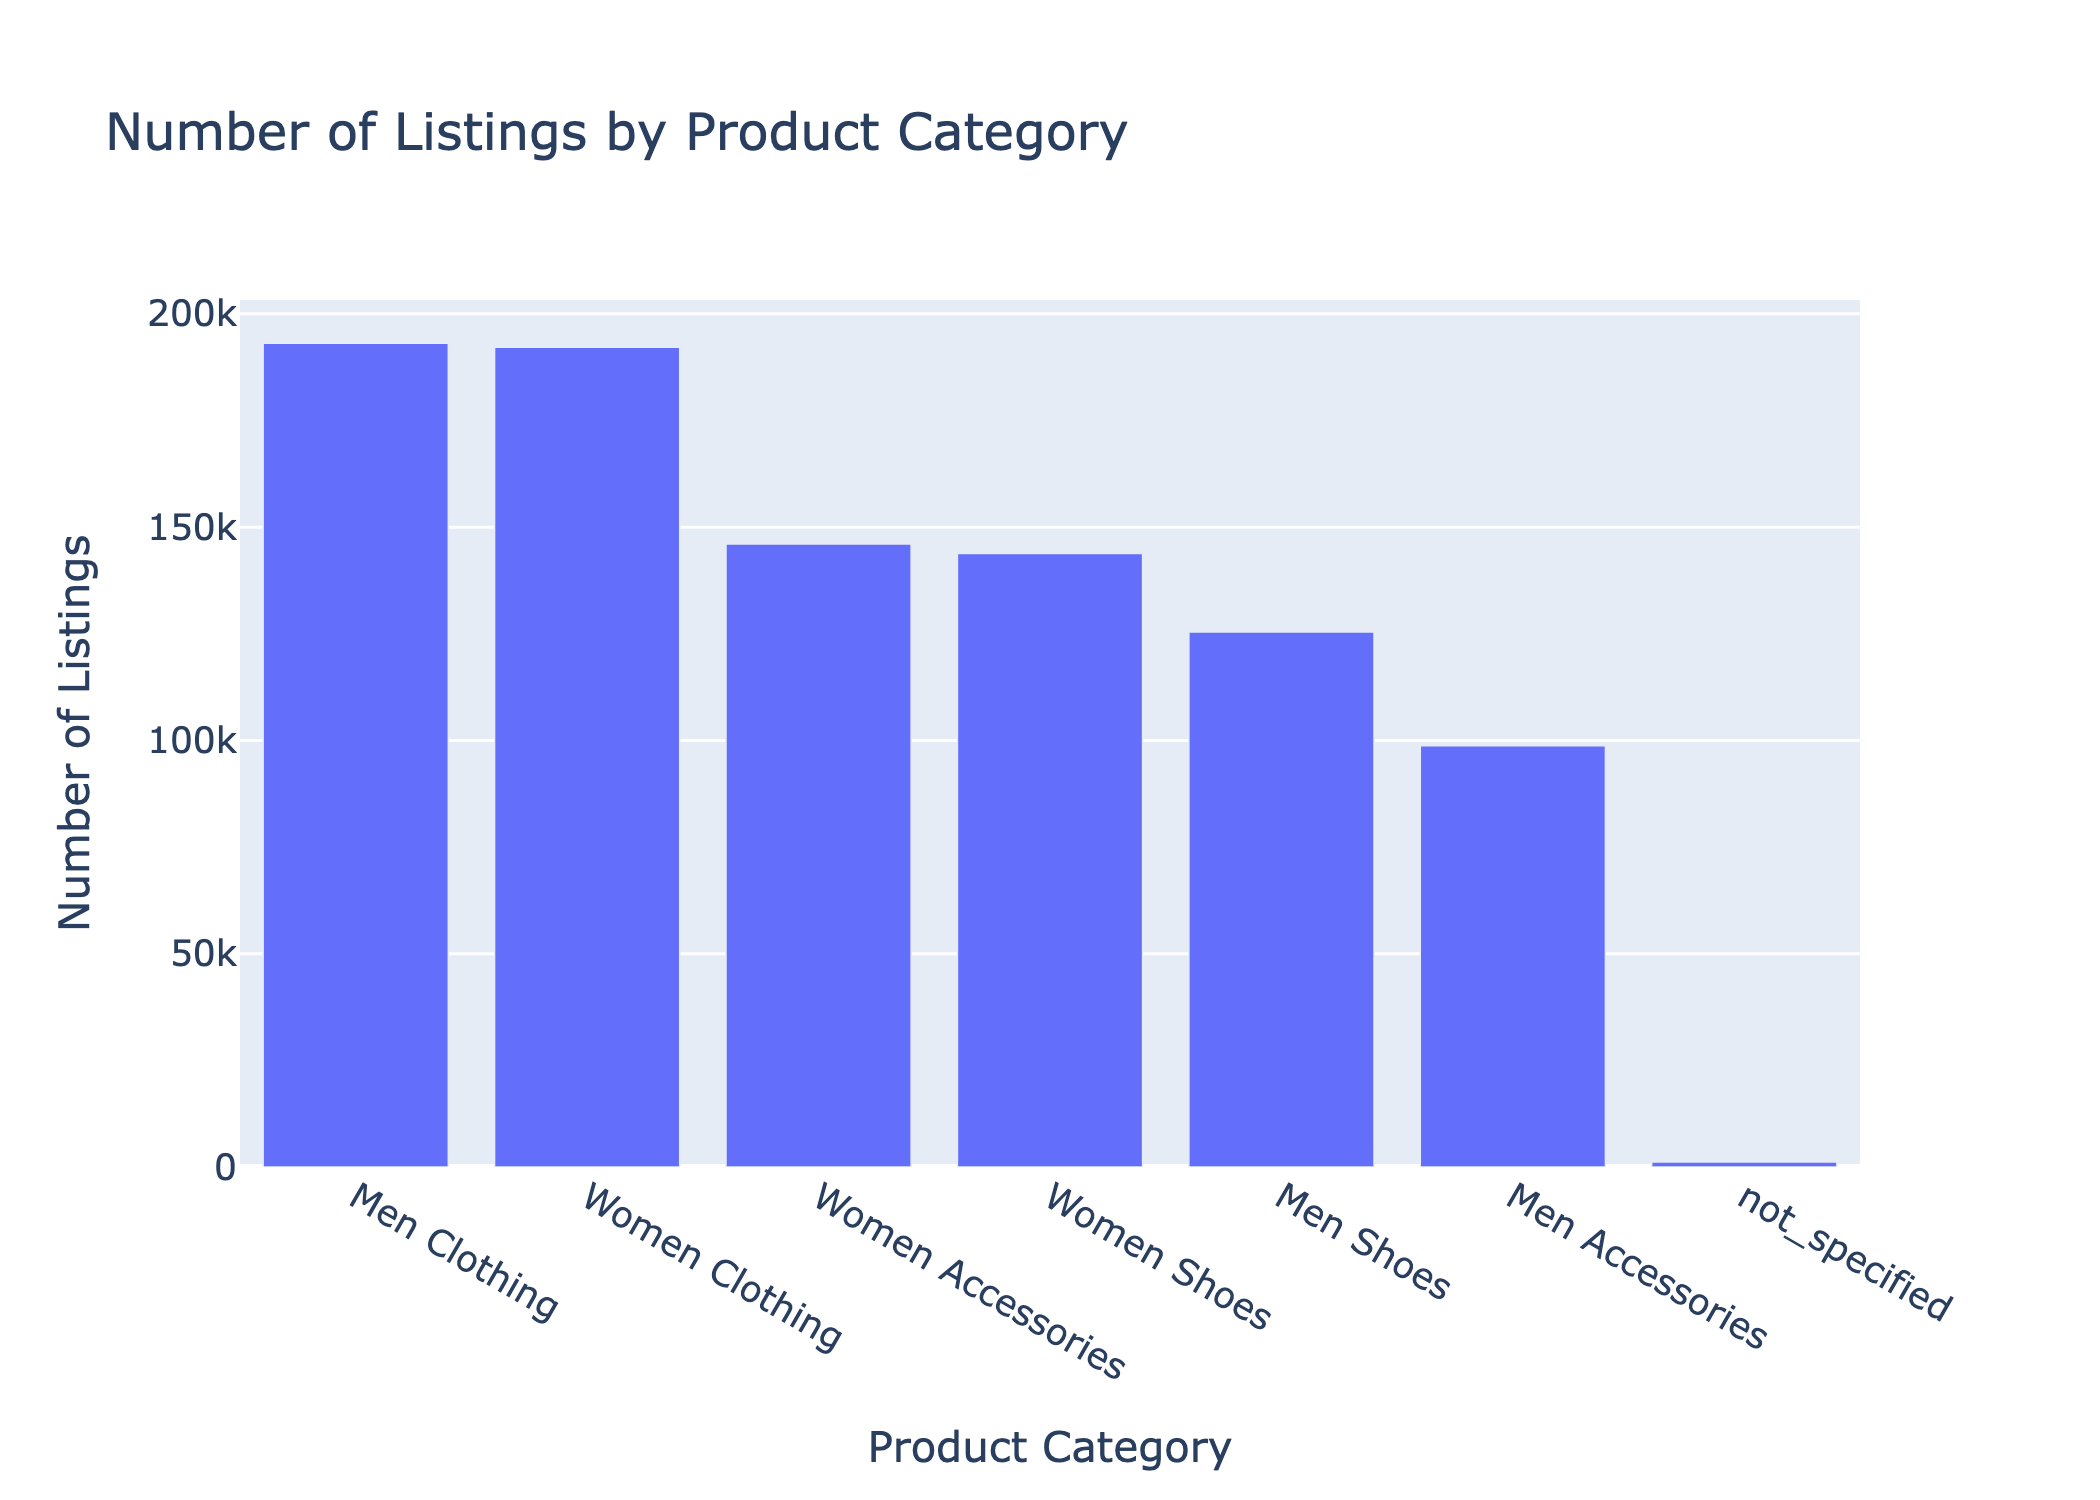

In [18]:
category_counts = df['product_category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

fig = px.bar(category_counts, x='Category', y='Count', title='Number of Listings by Product Category')
fig.update_layout(xaxis_title='Product Category', yaxis_title='Number of Listings')

img_bytes = fig.to_image(format="png", scale=3)
Image(img_bytes)

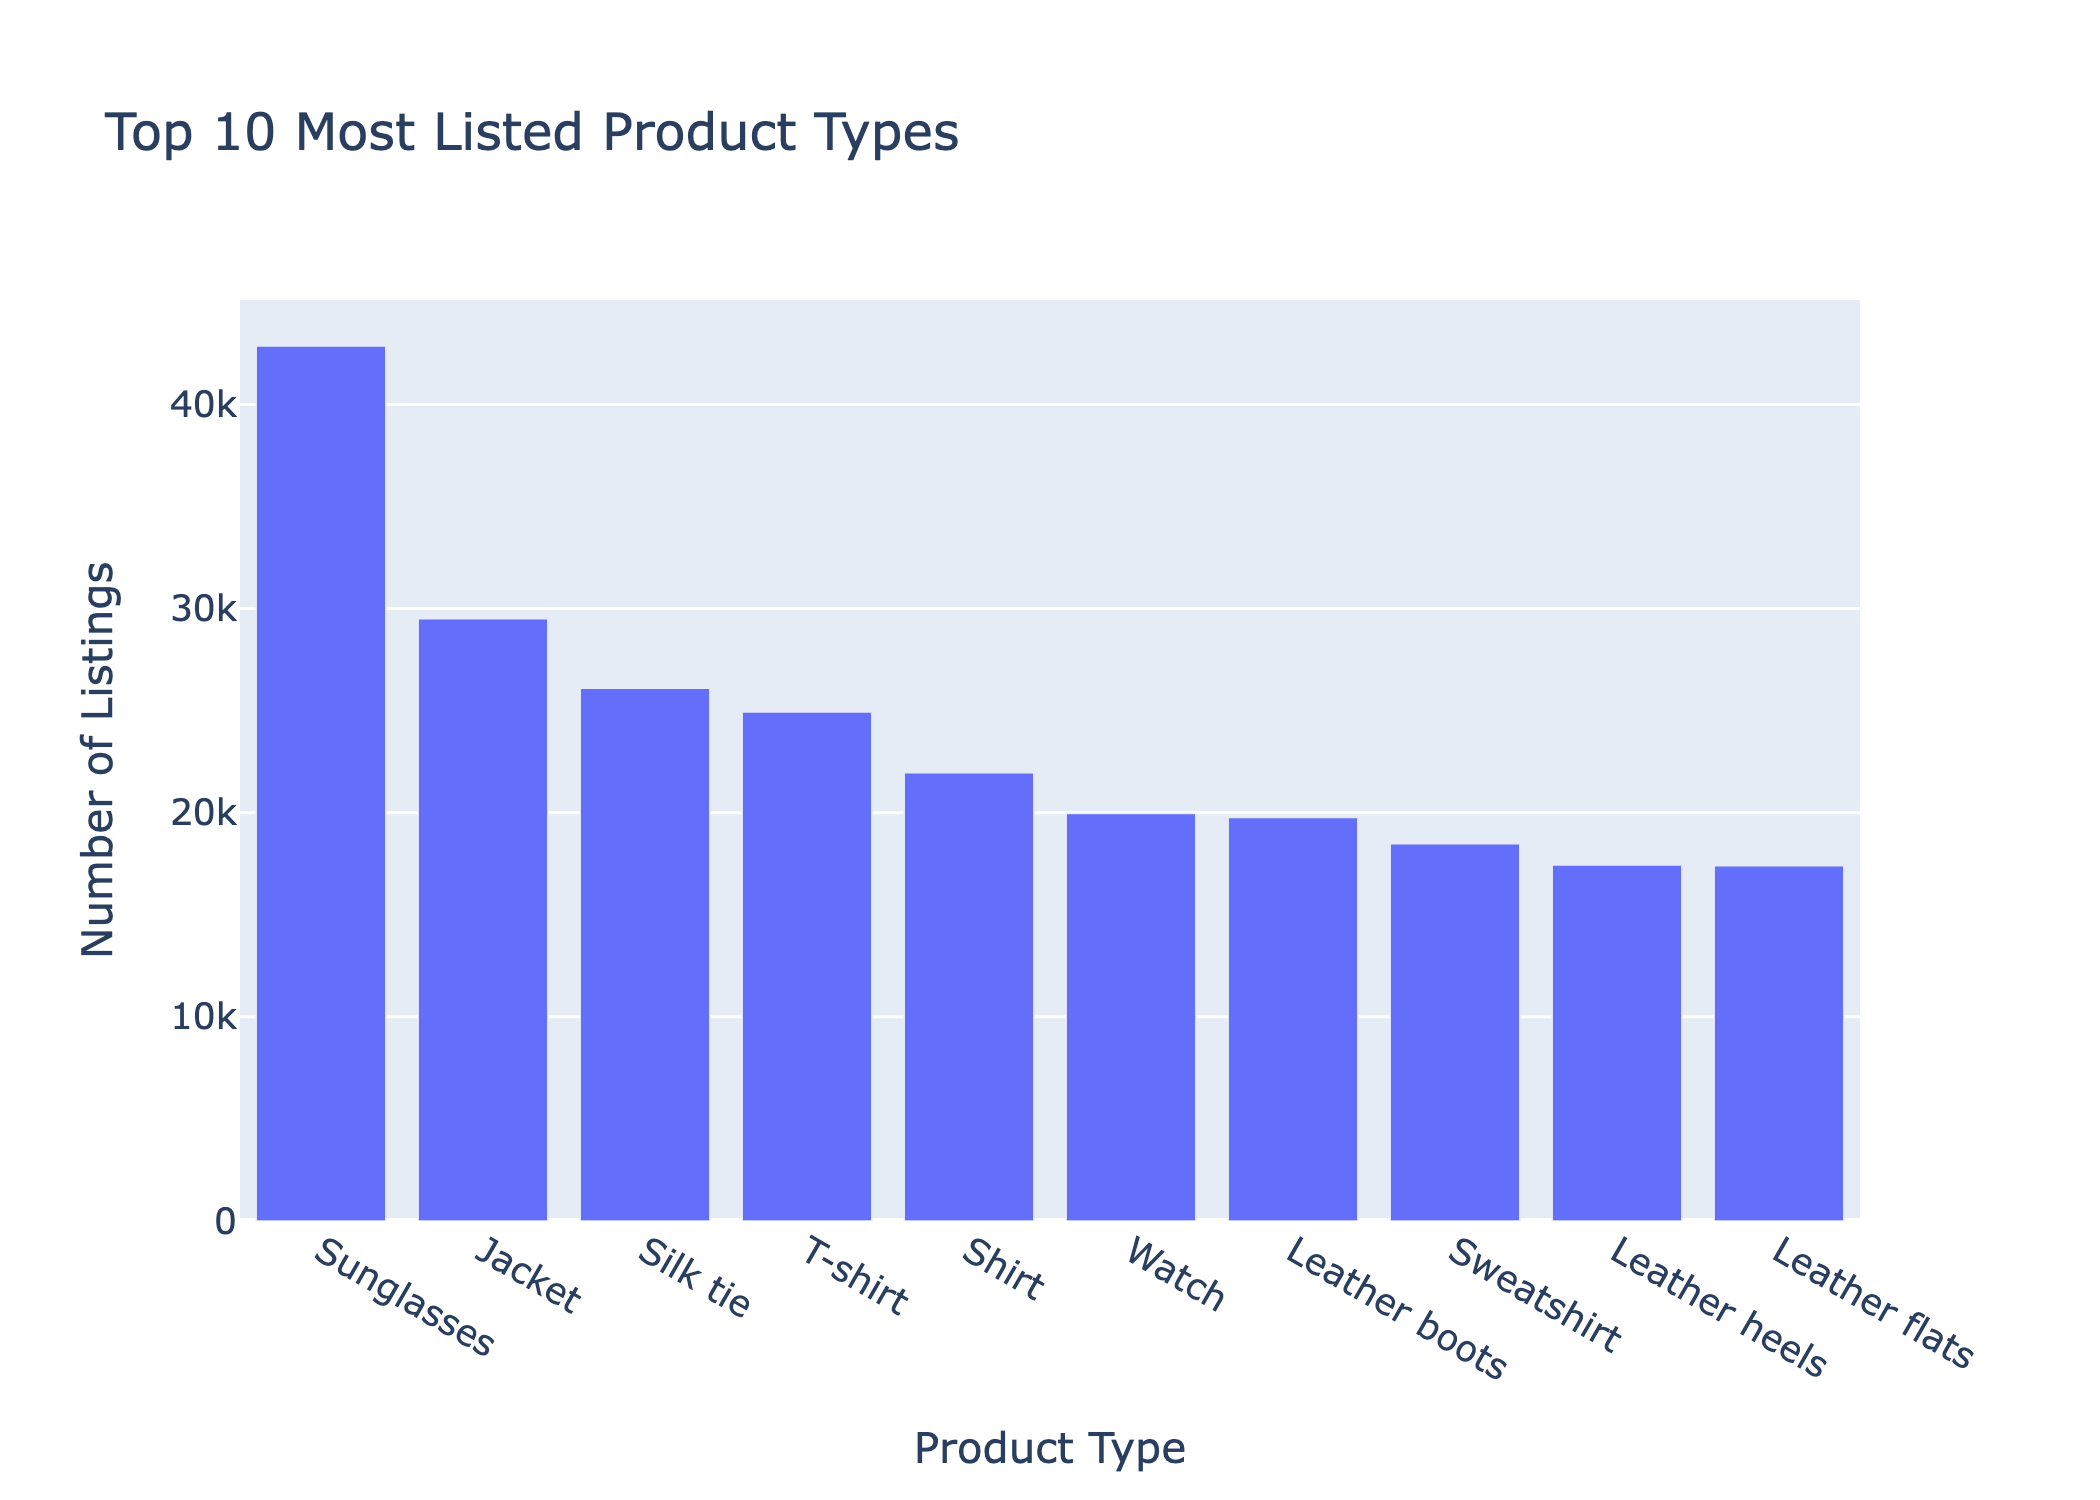

In [19]:
type_counts = df['product_type'].value_counts().nlargest(10).reset_index()
type_counts.columns = ['Type', 'Count']

fig = px.bar(type_counts, x='Type', y='Count', title='Top 10 Most Listed Product Types')
fig.update_layout(xaxis_title='Product Type', yaxis_title='Number of Listings')

img_bytes = fig.to_image(format="png", scale=3)
Image(img_bytes)

*   Create a bar chart showing the sell-through rate by `product_category`. This will reveal which categories are most in-demand.

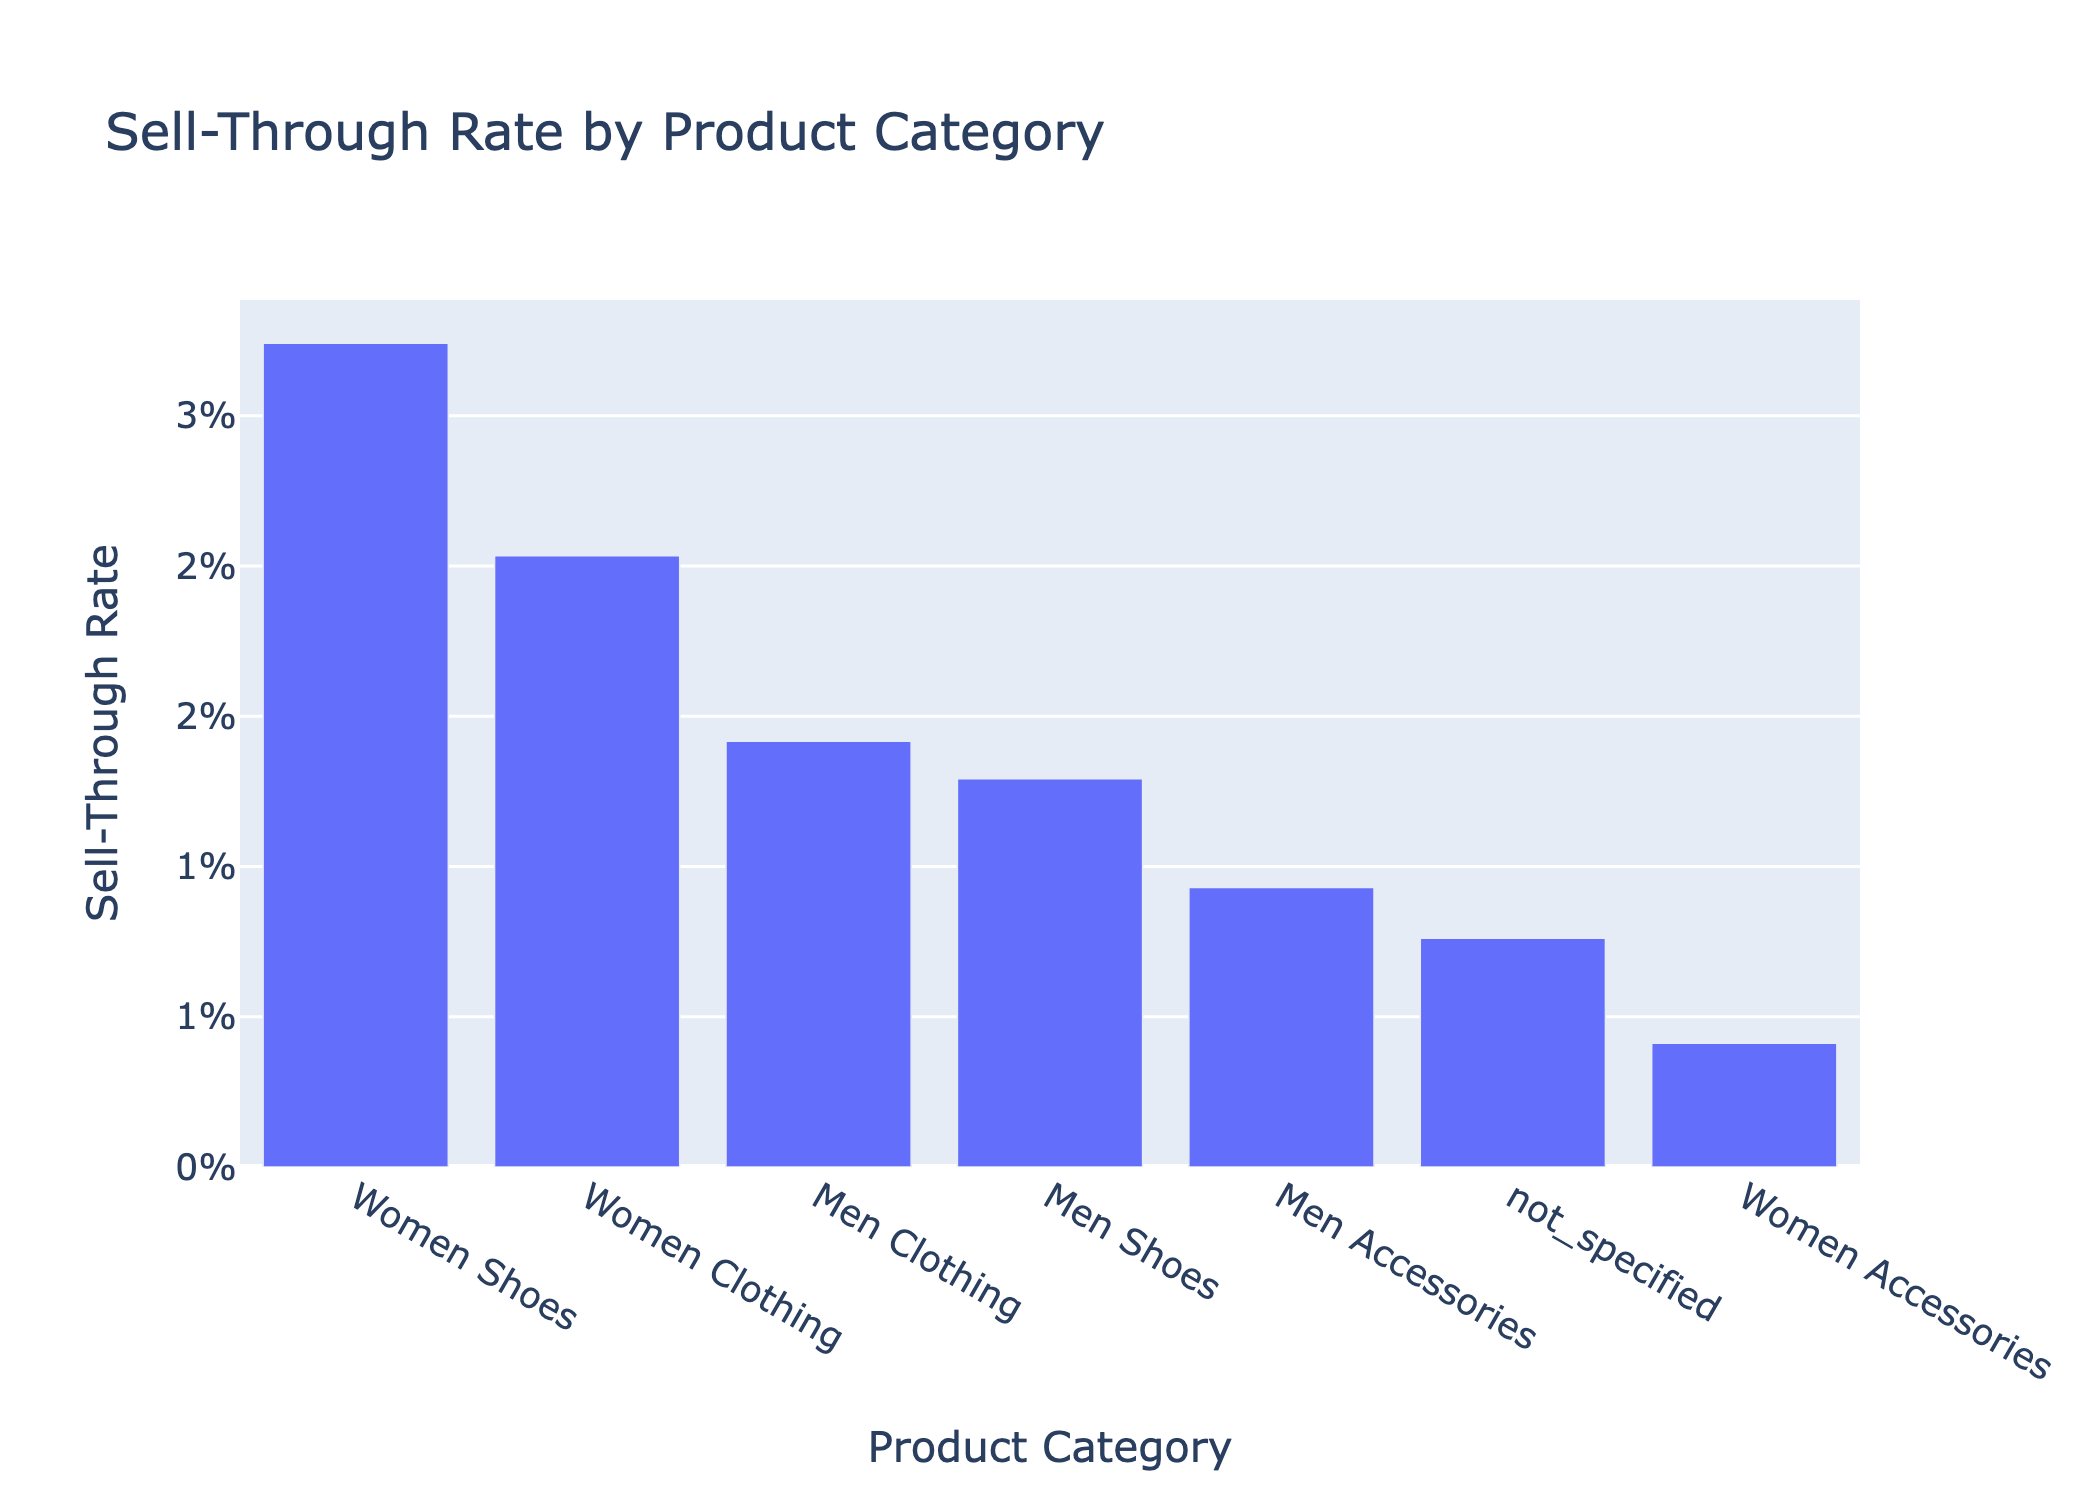

In [21]:
sell_through_by_category = df.groupby('product_category')['sold'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(sell_through_by_category, x='product_category', y='sold',
             title='Sell-Through Rate by Product Category',
             labels={'product_category': 'Product Category', 'sold': 'Sell-Through Rate'})
fig.update_layout(yaxis_tickformat='.0%')

img_bytes = fig.to_image(format="png", scale=3)
Image(img_bytes)

*   **Impact of Condition:**
    *   Use a box plot to show the distribution of `price_usd` for each `product_condition`.
    *   Use a bar chart to show the sell-through rate for each `product_condition`.

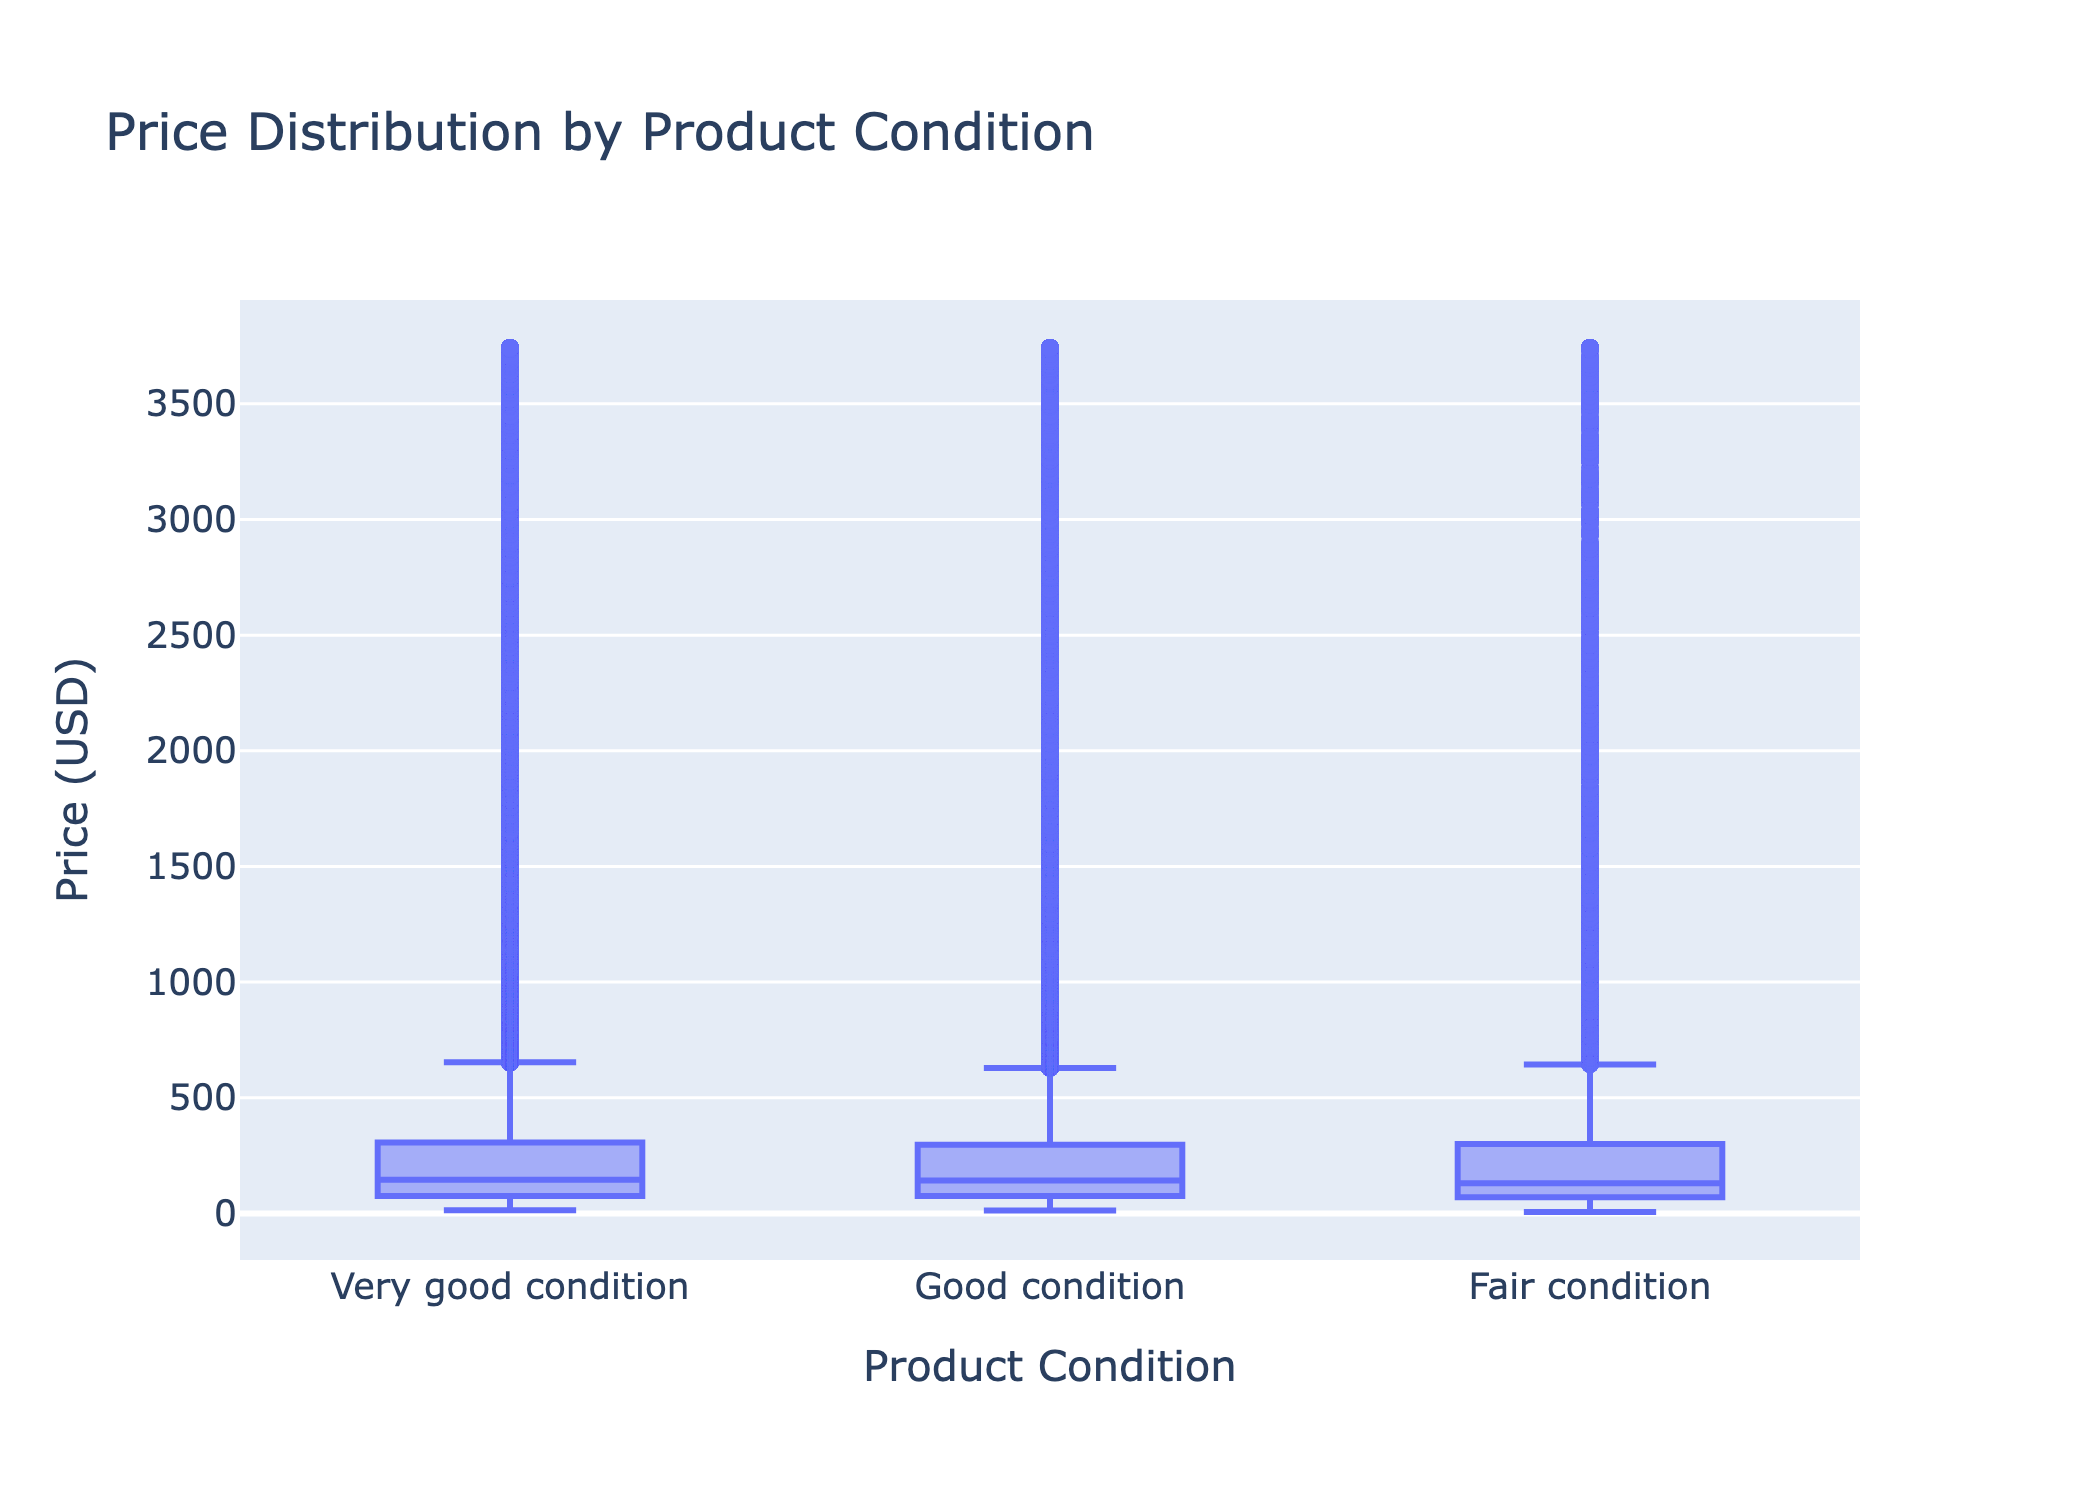

In [22]:
condition_order = ['Like new', 'Very good condition', 'Good condition', 'Fair condition']
df['product_condition'] = pd.Categorical(df['product_condition'], categories=condition_order, ordered=True)

fig = px.box(df.sort_values('product_condition'), x='product_condition', y='price_usd',
            title='Price Distribution by Product Condition',
            labels={'product_condition': 'Product Condition', 'price_usd': 'Price (USD)'})

img_bytes = fig.to_image(format="png", scale=3)
Image(img_bytes)

/var/folders/9r/_l7v_srn15z38xsssh084f4m0000gn/T/ipykernel_50017/2233563037.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



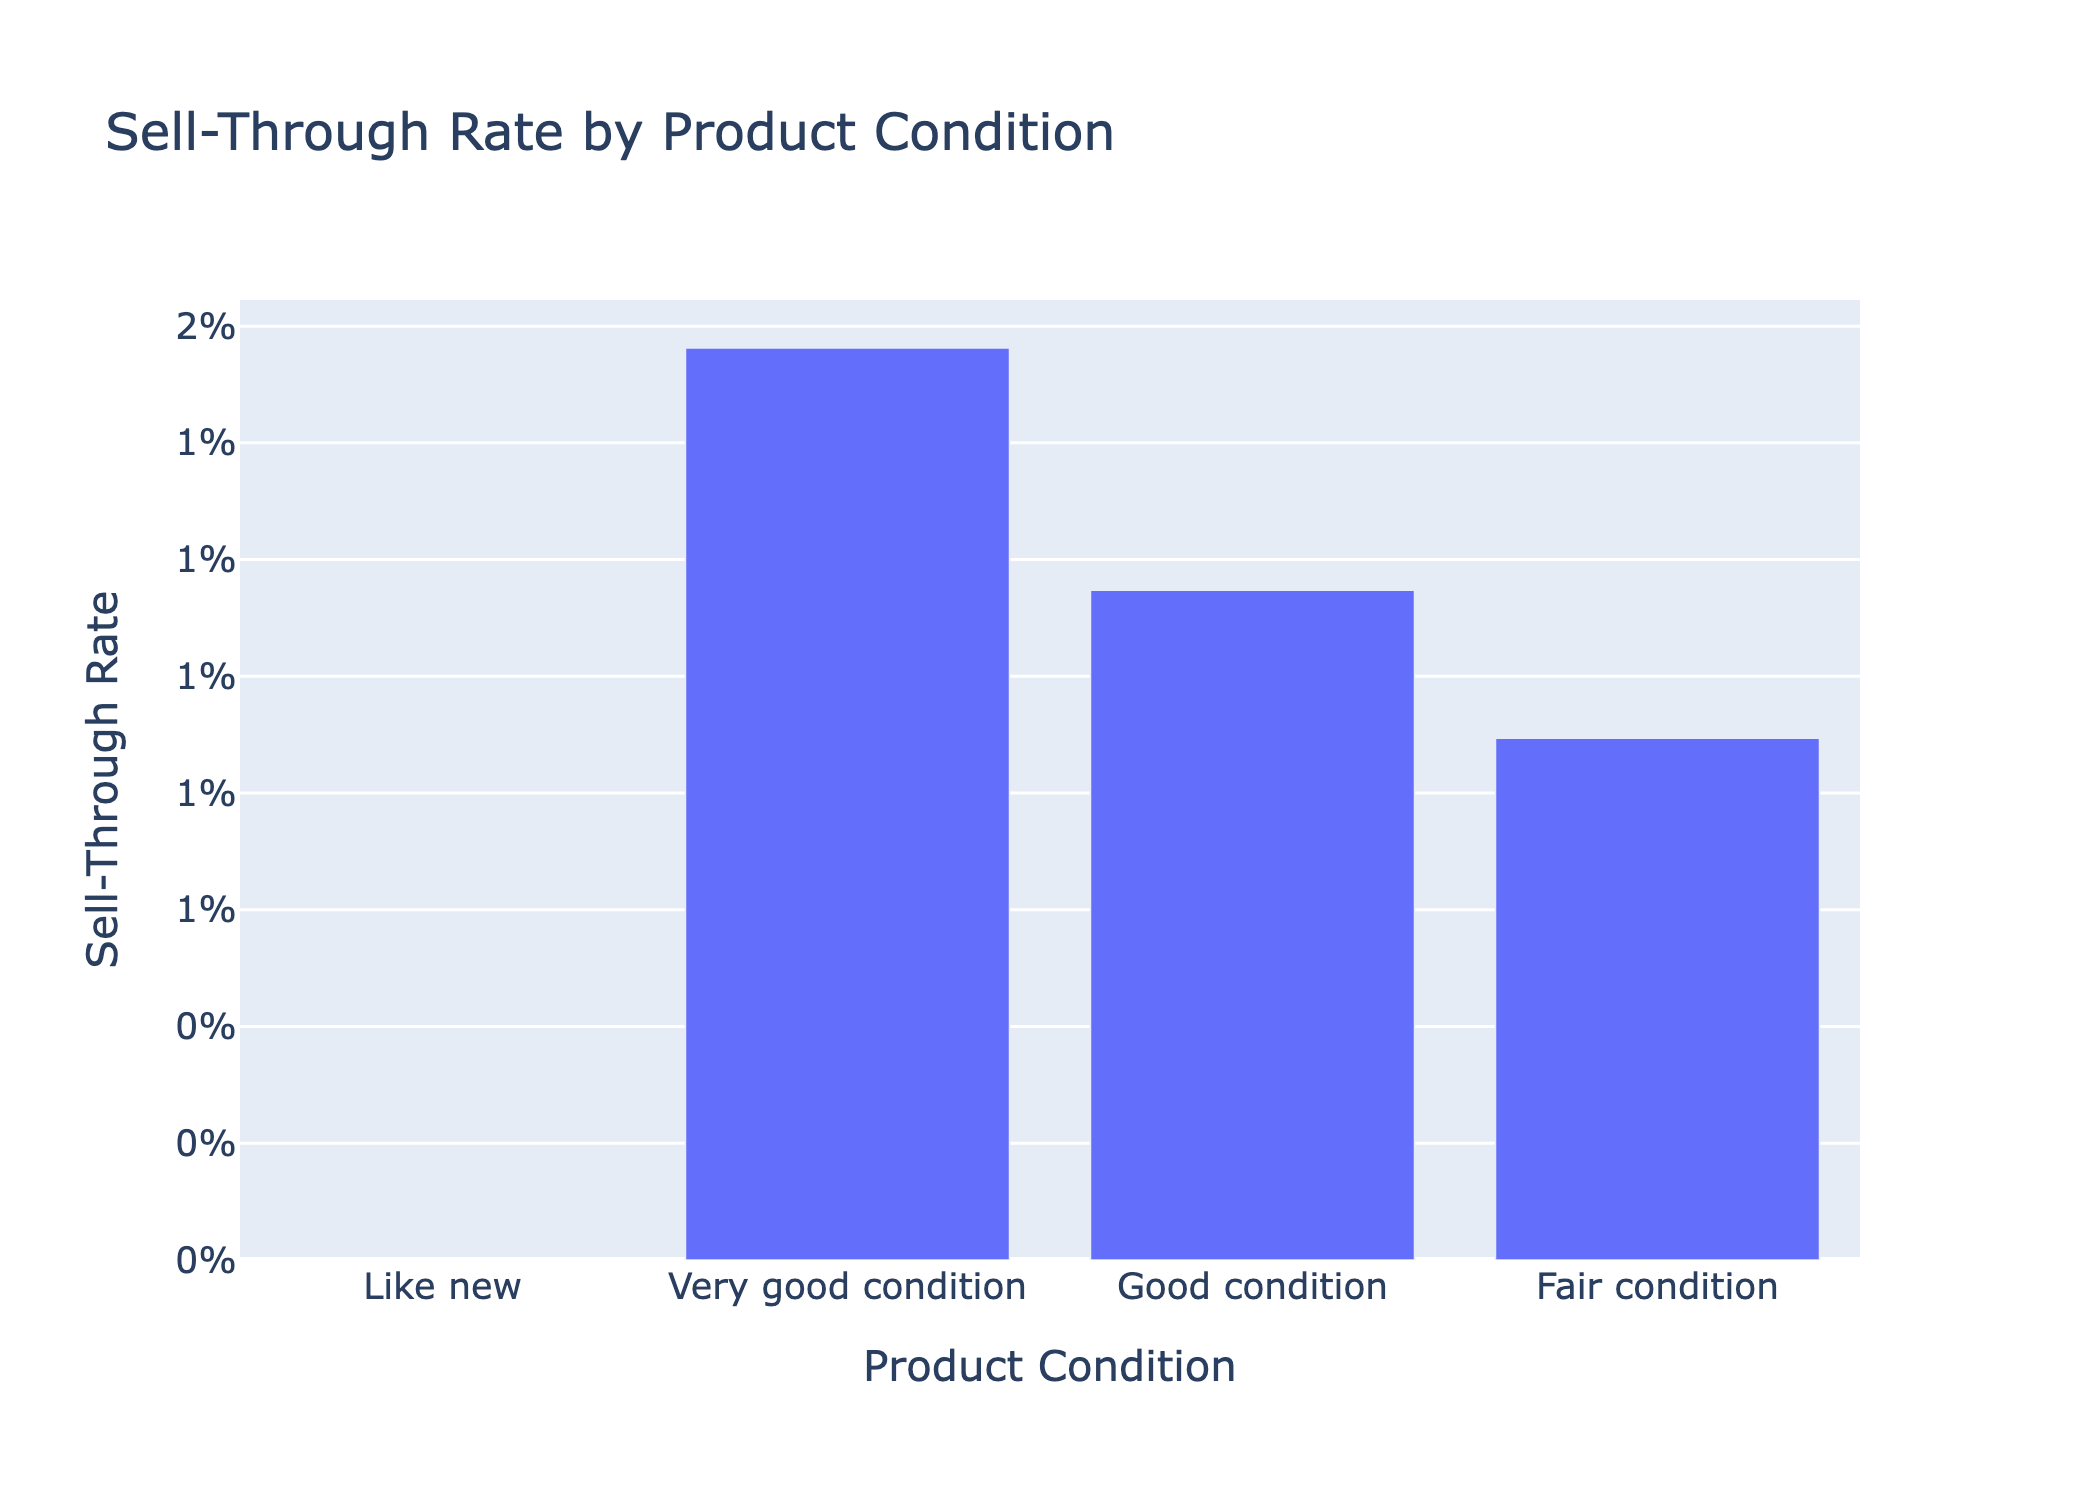

In [23]:
sell_through_by_condition = df.groupby('product_condition')['sold'].mean().reset_index()

fig = px.bar(sell_through_by_condition, x='product_condition', y='sold',
             title='Sell-Through Rate by Product Condition',
             labels={'product_condition': 'Product Condition', 'sold': 'Sell-Through Rate'})
fig.update_layout(yaxis_tickformat='.0%')

img_bytes = fig.to_image(format="png", scale=3)
Image(img_bytes)

*   **Color and Material:**
    *   Analyze the most common `product_material` and `product_color` combinations.
    *   Calculate the average price and sell-through rate for the top 5 materials and colors to see which drive value and demand.

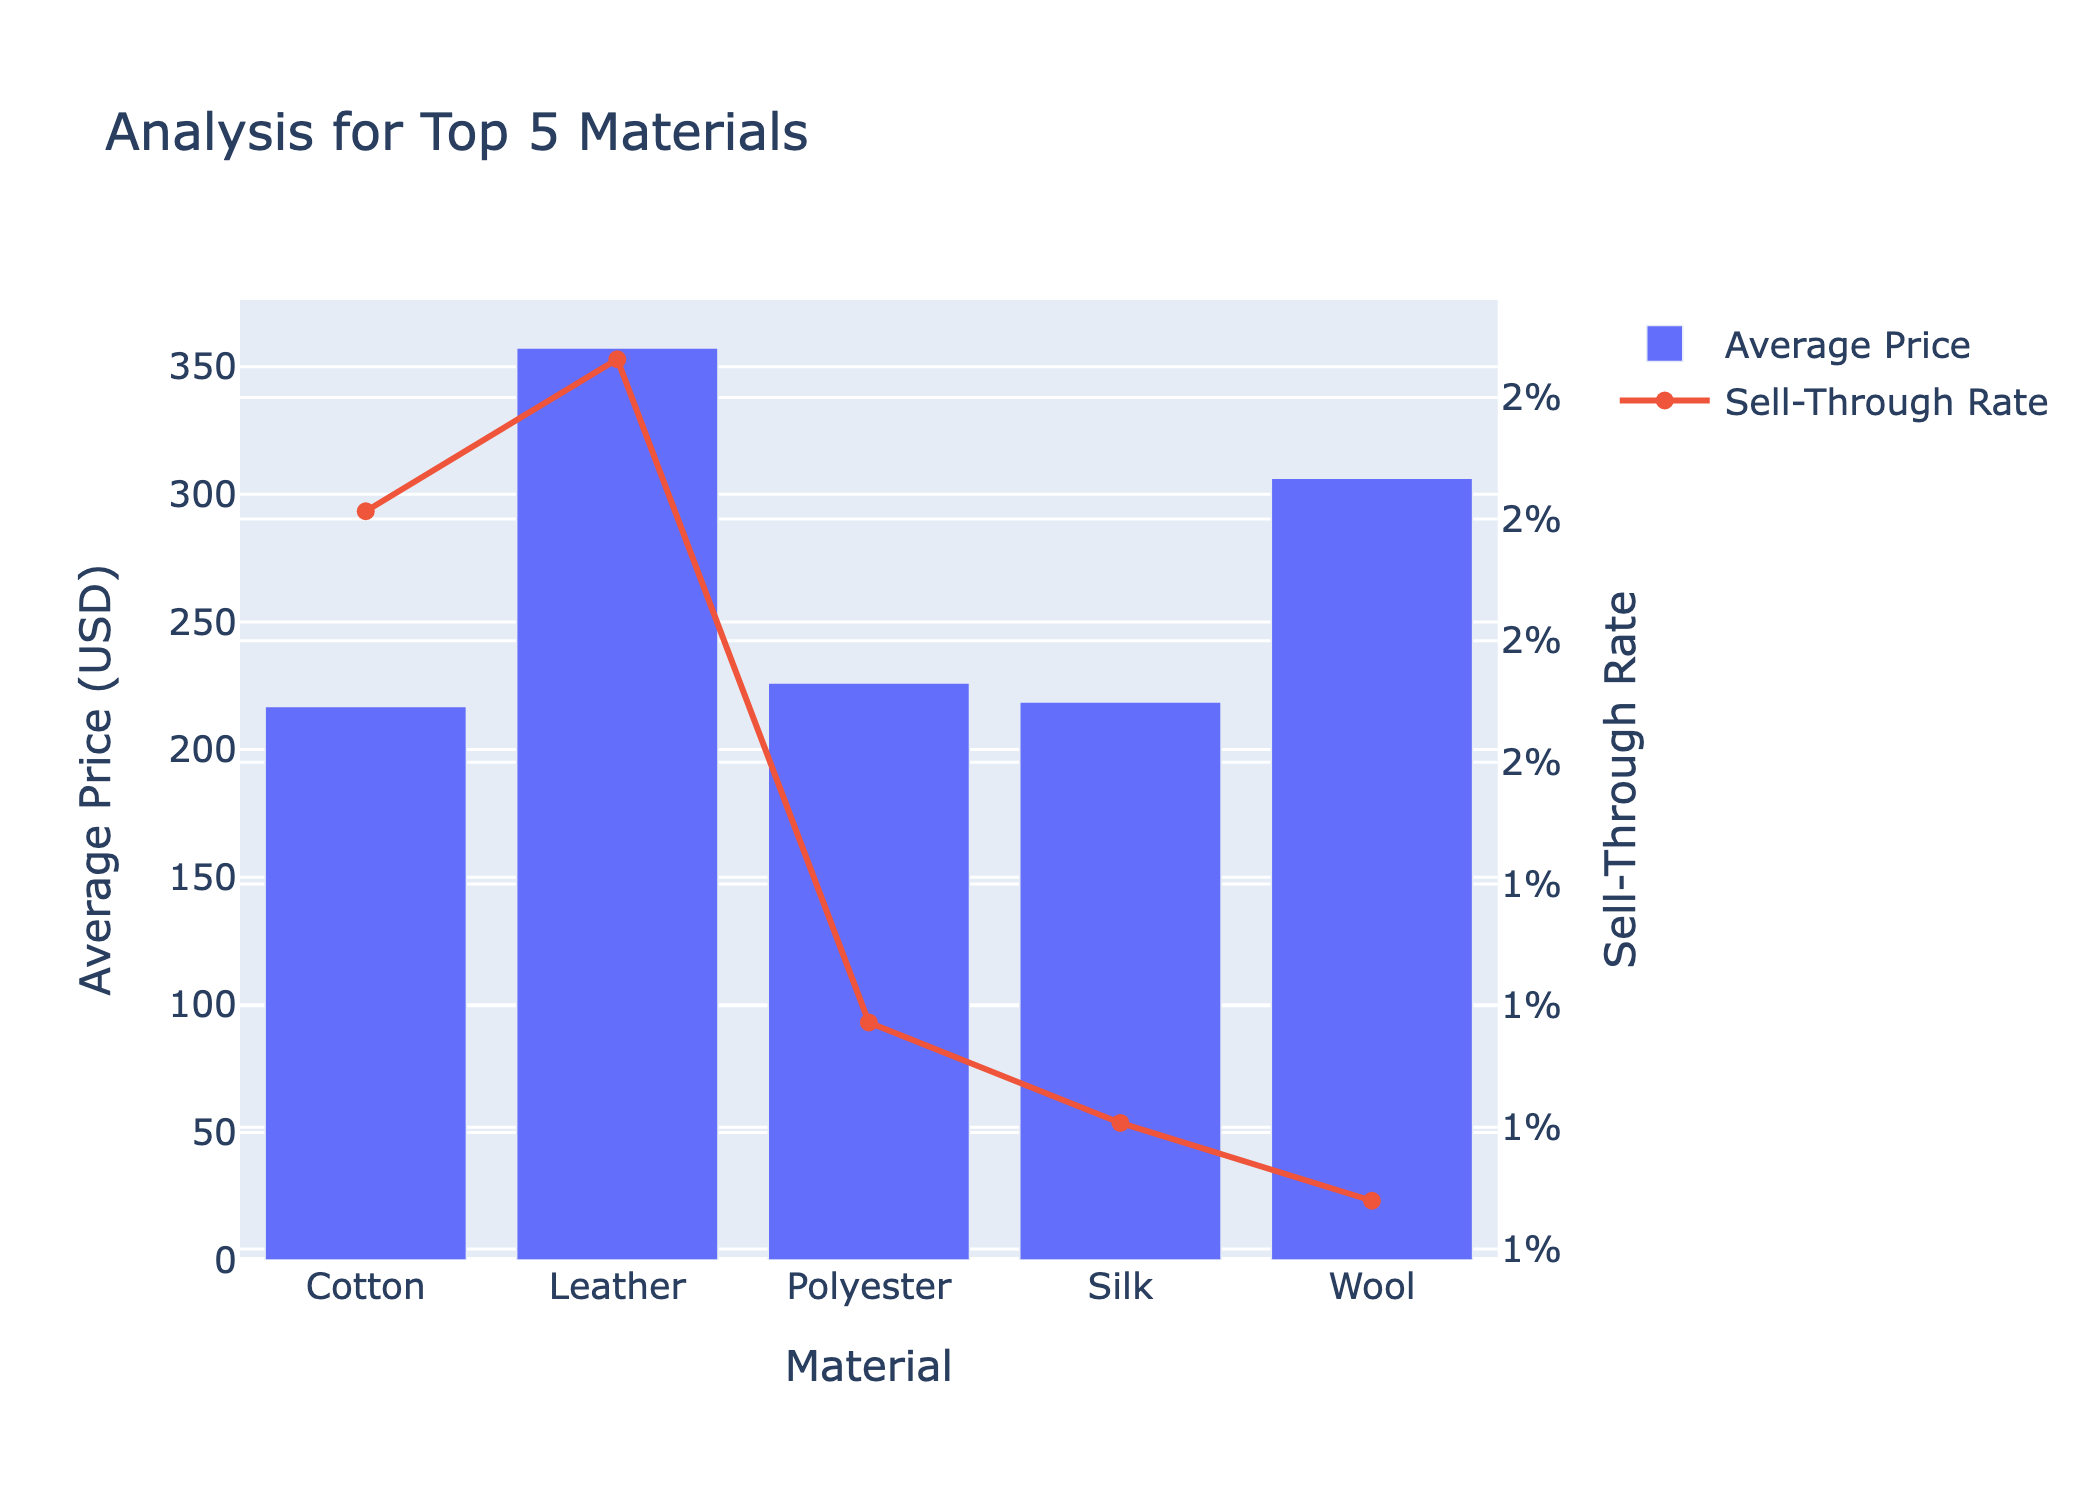

In [24]:
top_materials = df['product_material'].value_counts().nlargest(5).index
material_analysis = df[df['product_material'].isin(top_materials)]

material_summary = material_analysis.groupby('product_material').agg(
    avg_price=('price_usd', 'mean'),
    sell_through_rate=('sold', 'mean')
).reset_index()

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=material_summary['product_material'], y=material_summary['avg_price'], name='Average Price'), secondary_y=False)
fig.add_trace(go.Scatter(x=material_summary['product_material'], y=material_summary['sell_through_rate'], name='Sell-Through Rate', mode='lines+markers'), secondary_y=True)

fig.update_layout(title_text='Analysis for Top 5 Materials', xaxis_title='Material')
fig.update_yaxes(title_text='Average Price (USD)', secondary_y=False)
fig.update_yaxes(title_text='Sell-Through Rate', secondary_y=True, tickformat='.0%')

img_bytes = fig.to_image(format="png", scale=3)
Image(img_bytes)

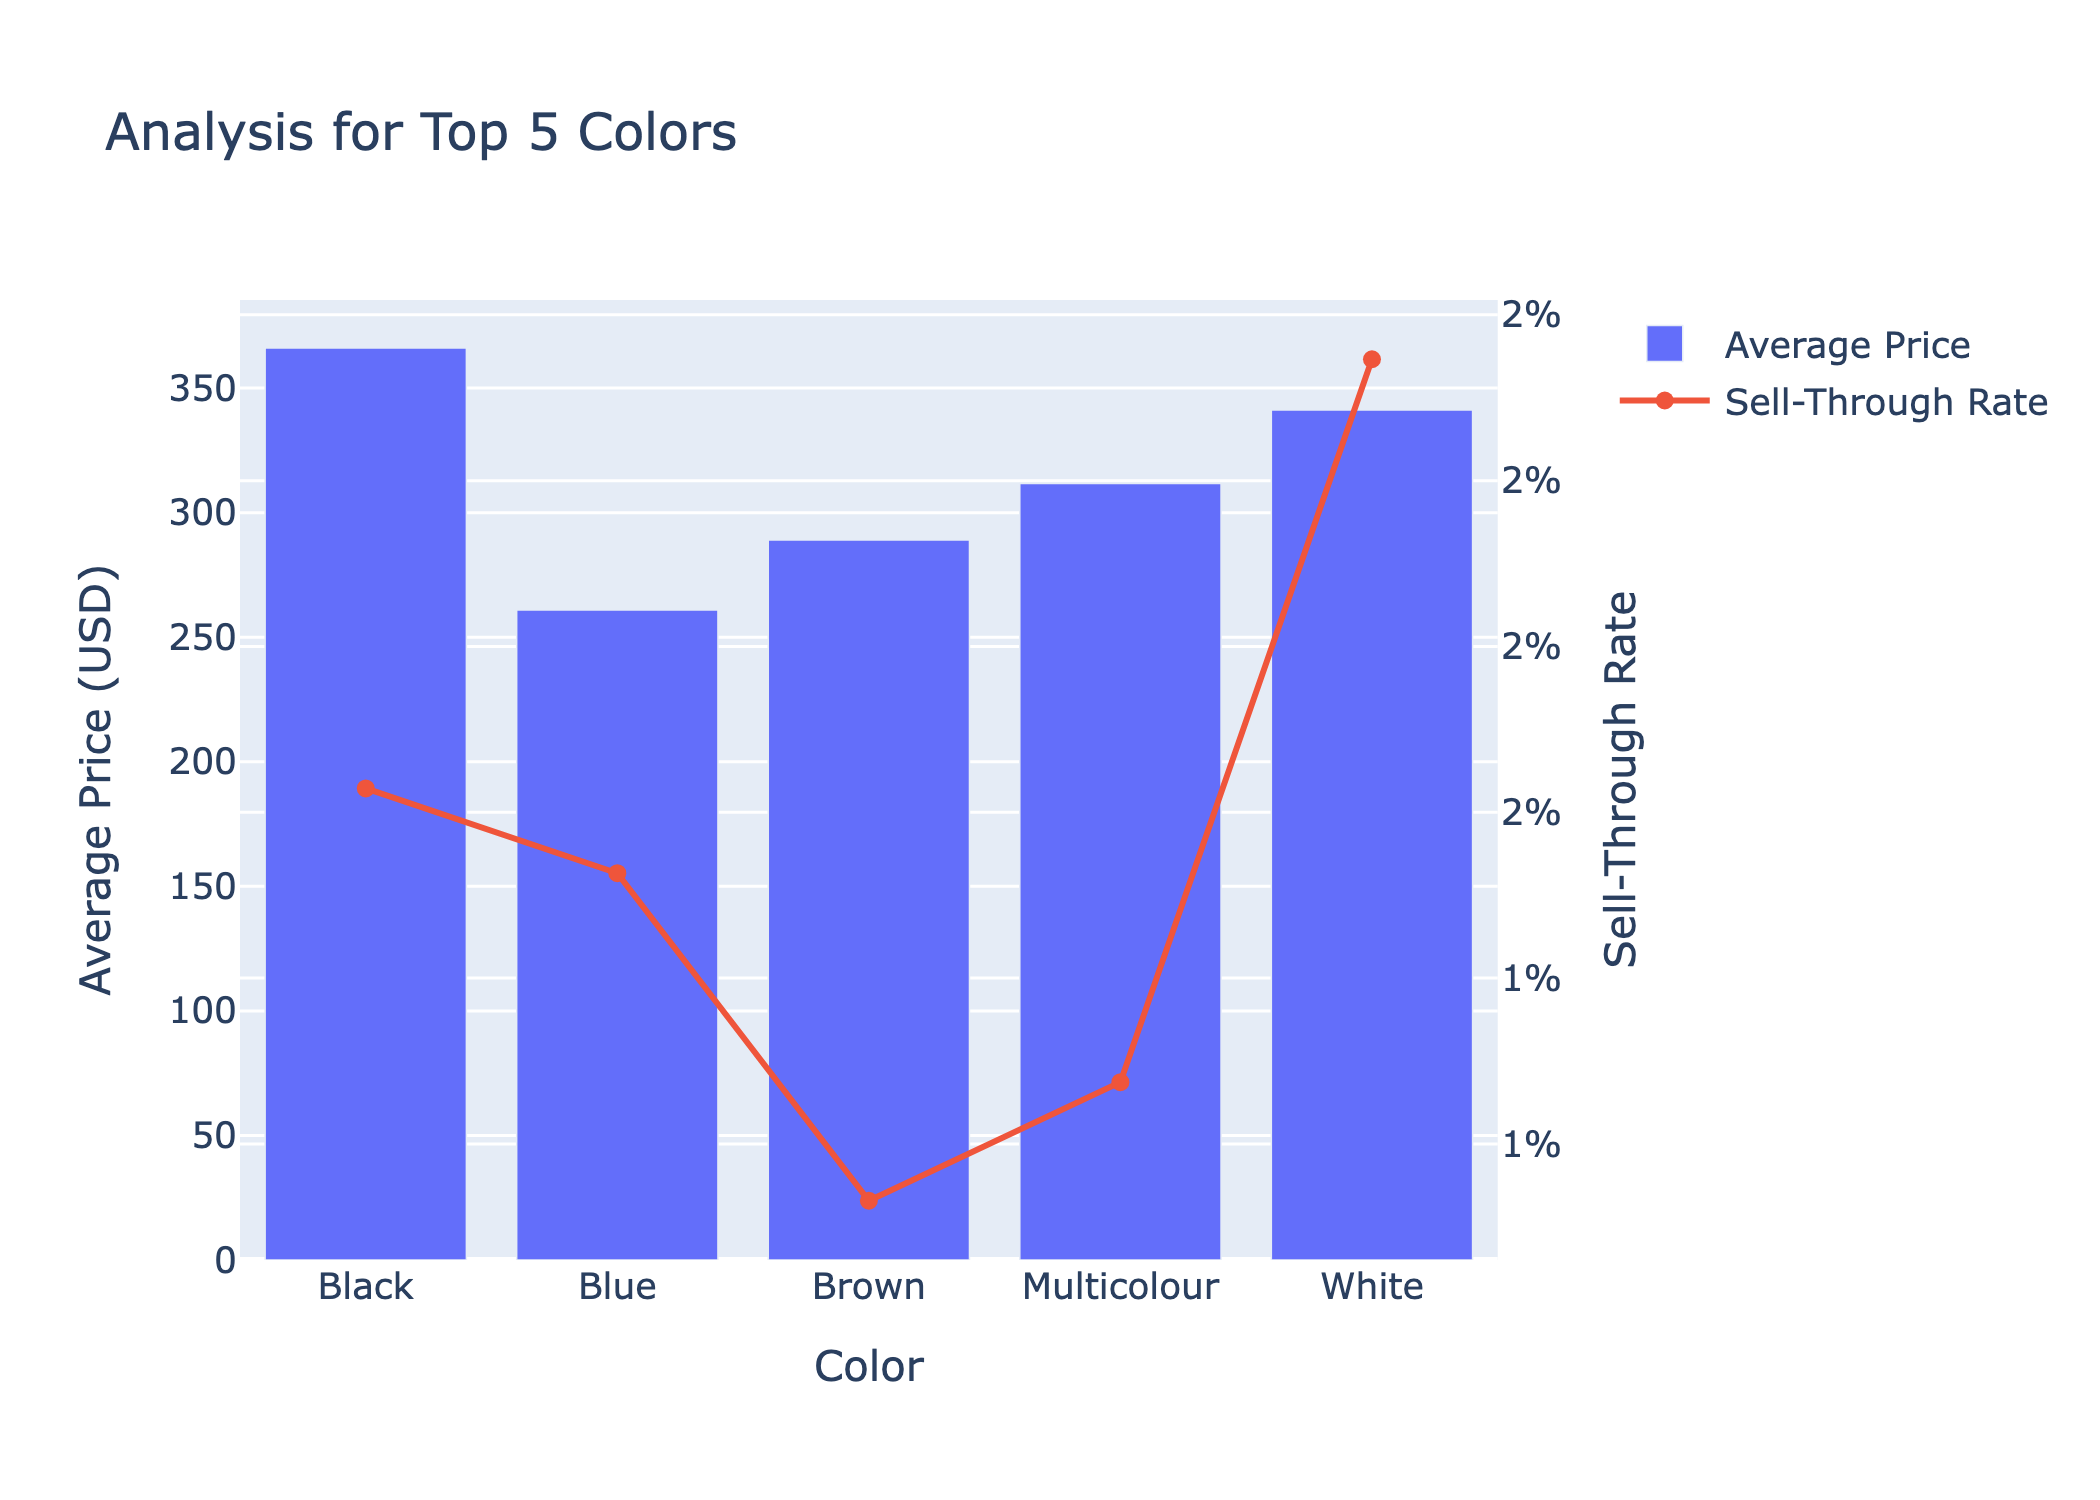

In [25]:
top_colors = df['product_color'].value_counts().nlargest(5).index
color_analysis = df[df['product_color'].isin(top_colors)]

color_summary = color_analysis.groupby('product_color').agg(
    avg_price=('price_usd', 'mean'),
    sell_through_rate=('sold', 'mean')
).reset_index()

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=color_summary['product_color'], y=color_summary['avg_price'], name='Average Price'), secondary_y=False)
fig.add_trace(go.Scatter(x=color_summary['product_color'], y=color_summary['sell_through_rate'], name='Sell-Through Rate', mode='lines+markers'), secondary_y=True)

fig.update_layout(title_text='Analysis for Top 5 Colors', xaxis_title='Color')
fig.update_yaxes(title_text='Average Price (USD)', secondary_y=False)
fig.update_yaxes(title_text='Sell-Through Rate', secondary_y=True, tickformat='.0%')

img_bytes = fig.to_image(format="png", scale=3)
Image(img_bytes)

*   **Impact of Seller Reputation:**
    *   Compare the average sell-through rate for products listed by sellers with different `seller_badge` types (e.g., 'Trusted Seller', 'Expert Seller' vs. 'No Badge').

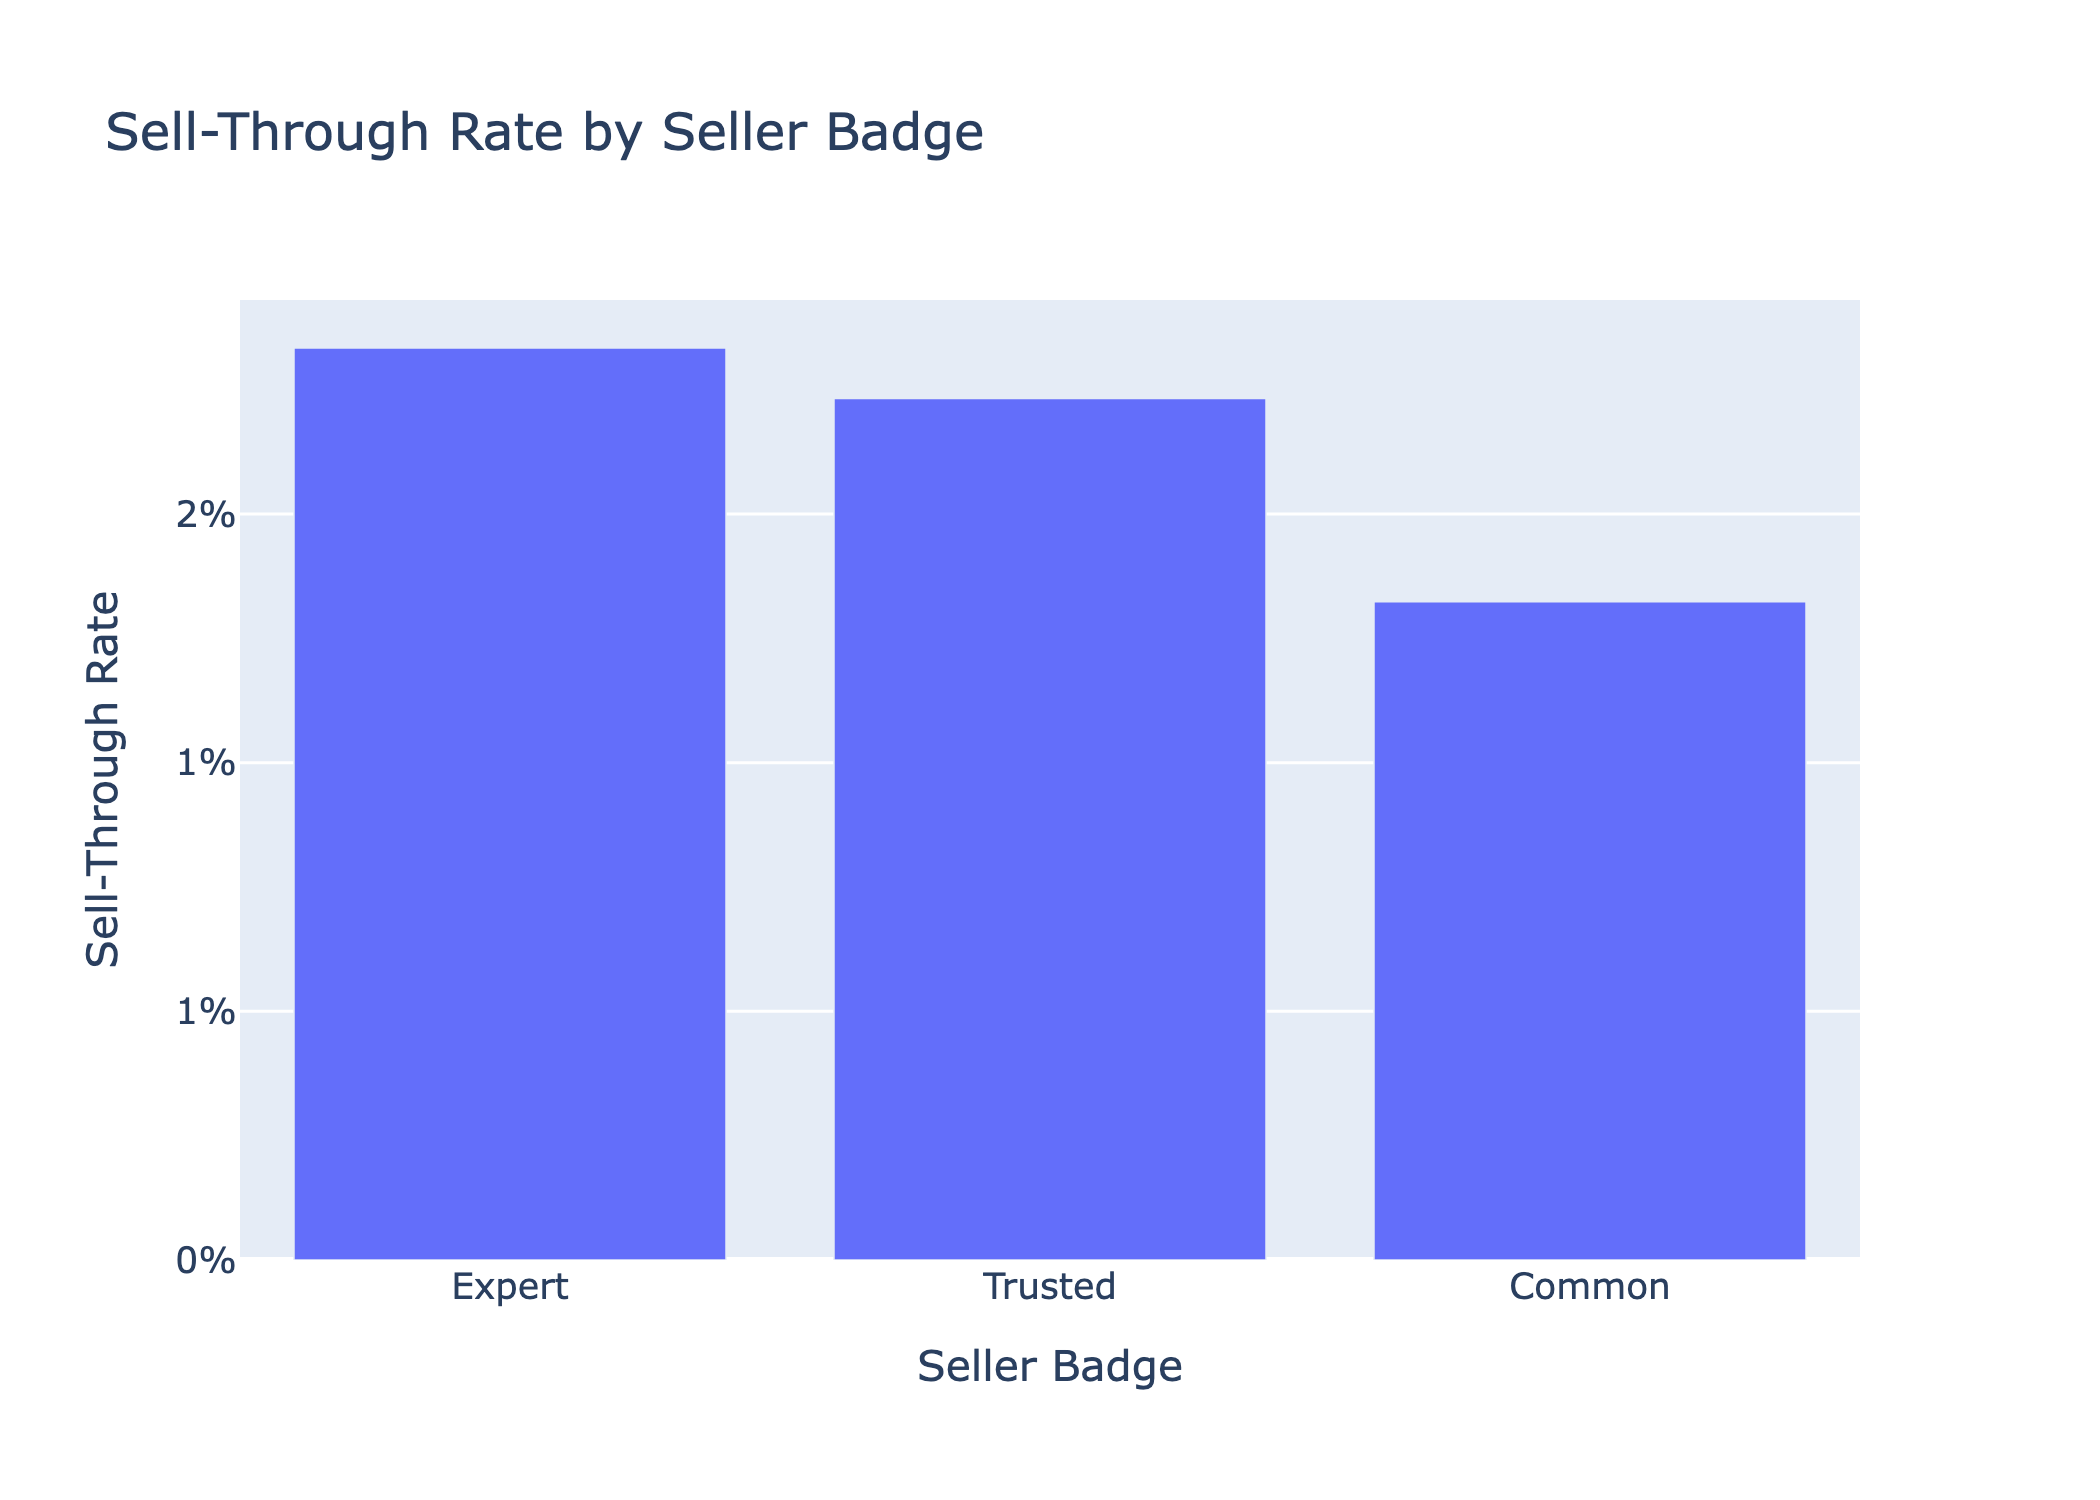

In [29]:
sell_through_by_badge = df.groupby('seller_badge')['sold'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(sell_through_by_badge, x='seller_badge', y='sold',
             title='Sell-Through Rate by Seller Badge',
             labels={'seller_badge': 'Seller Badge', 'sold': 'Sell-Through Rate'})
fig.update_layout(yaxis_tickformat='.0%')

img_bytes = fig.to_image(format="png", scale=3)
Image(img_bytes)

*   **Geographic Analysis:**
    *   Create a bar chart of `seller_country` to identify the top countries where sellers are located.

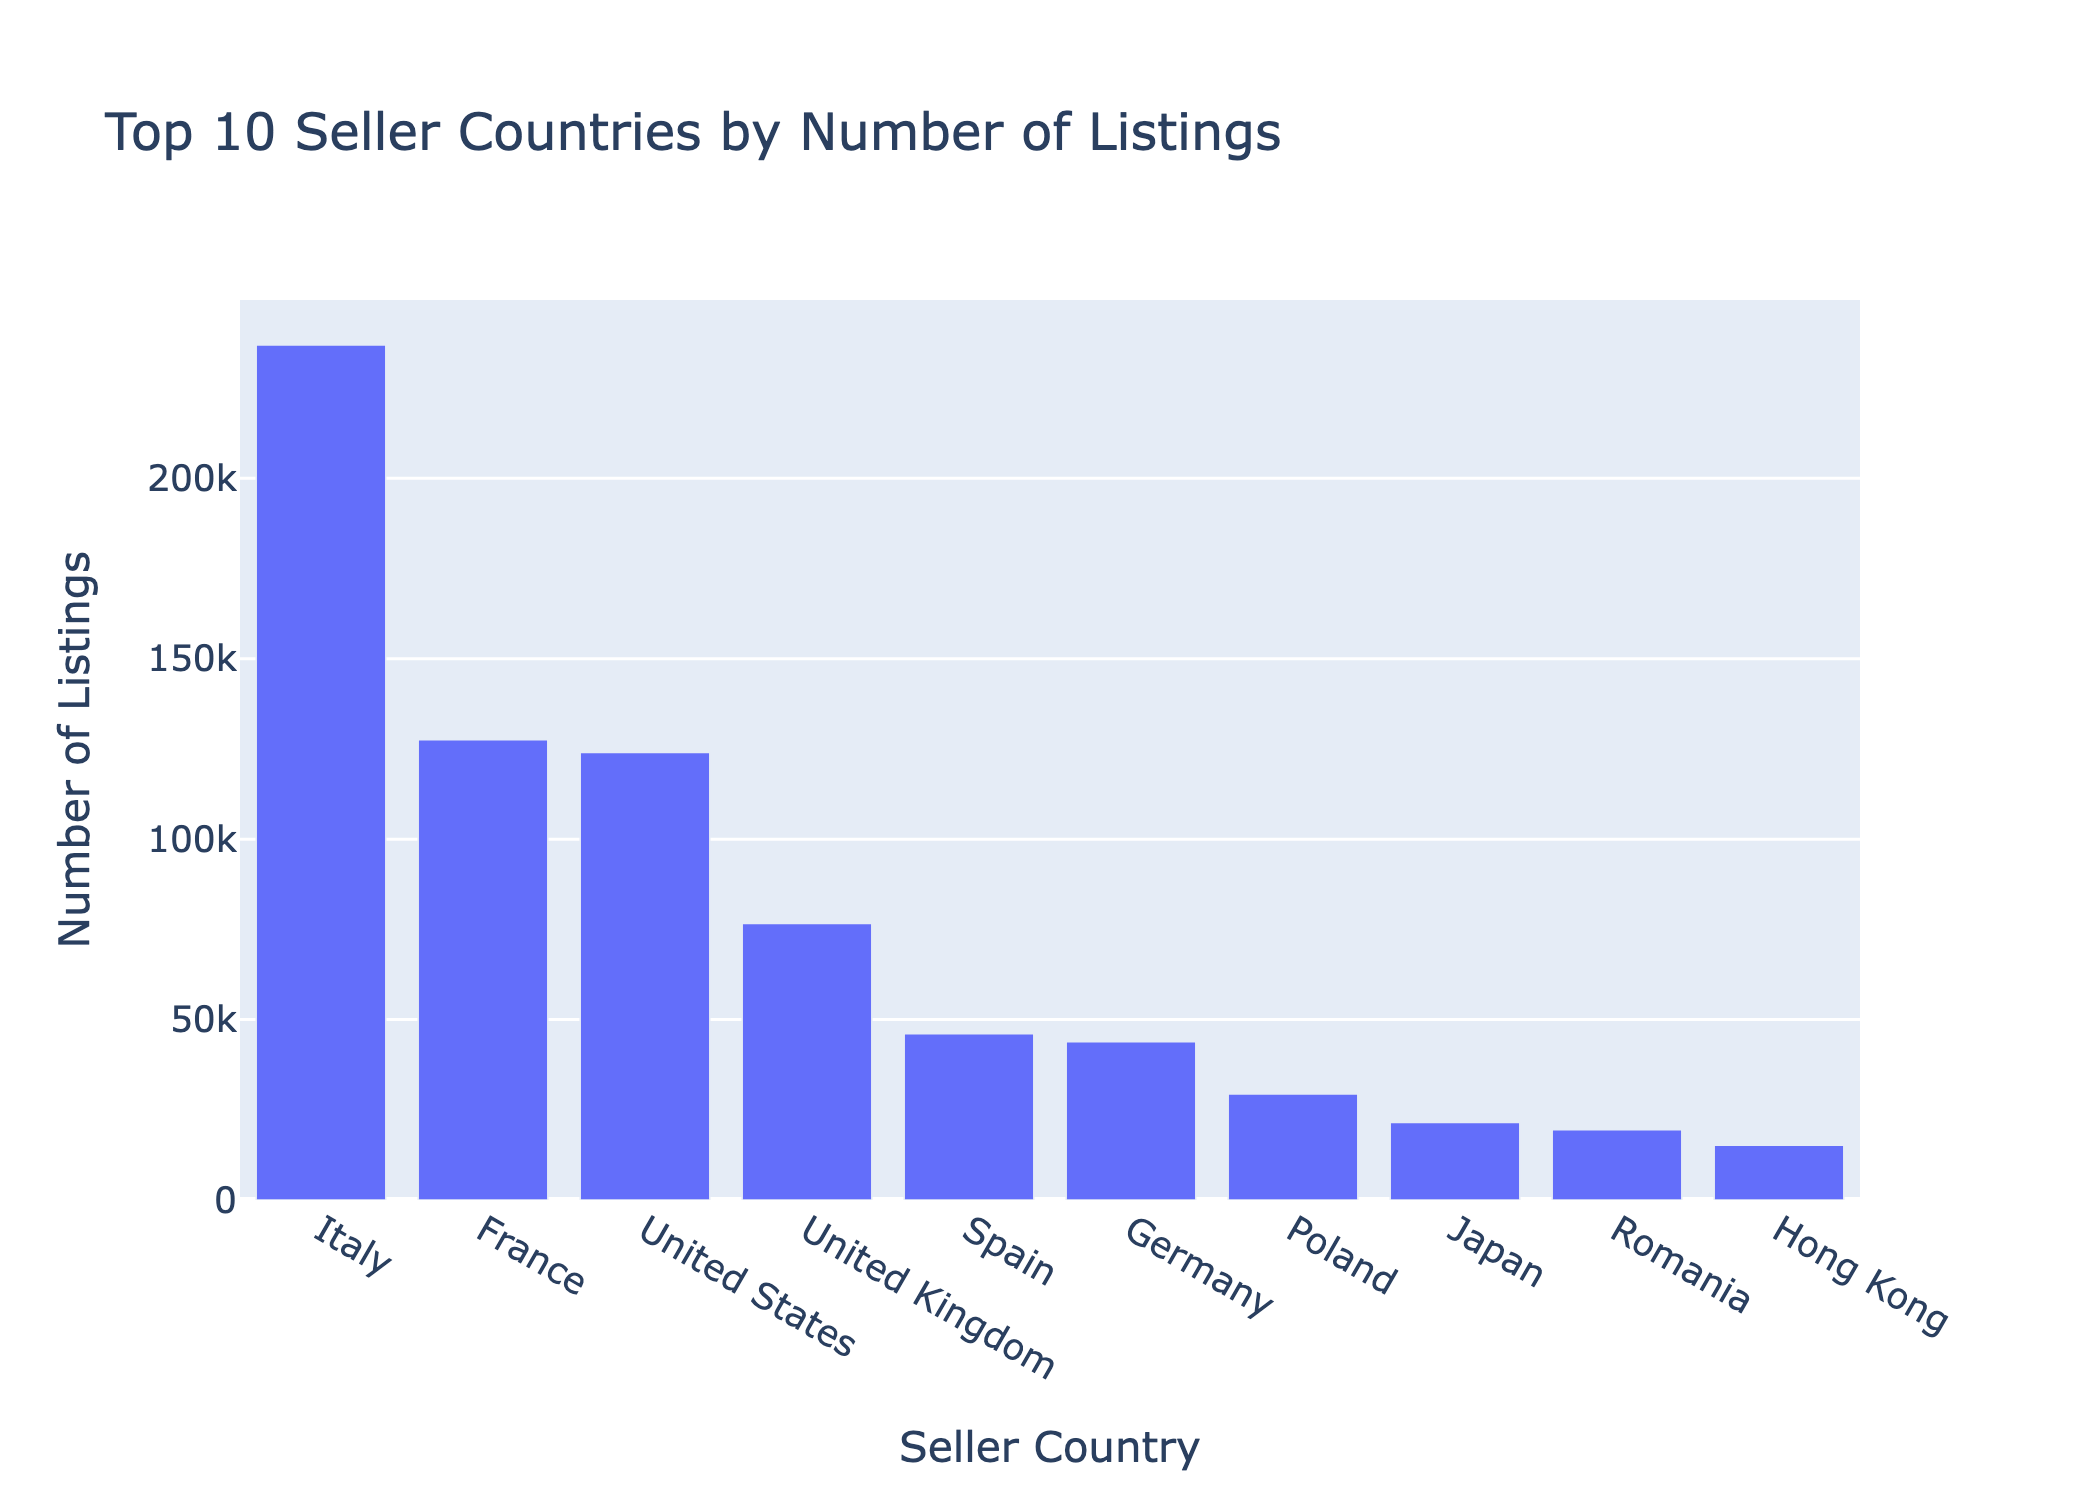

In [30]:
country_counts = df['seller_country'].value_counts().nlargest(10).reset_index()
country_counts.columns = ['Country', 'Count']

fig = px.bar(country_counts, x='Country', y='Count', title='Top 10 Seller Countries by Number of Listings')
fig.update_layout(xaxis_title='Seller Country', yaxis_title='Number of Listings')

img_bytes = fig.to_image(format="png", scale=3)
Image(img_bytes)

**2.4. Customer Engagement Analysis:**
*   **"Likes" as a Purchase Indicator:**
    *   Create a scatter plot of `product_like_count` vs. `price_usd`.
    *   Compare the average `product_like_count` for `sold` vs. `unsold` items. This will test the hypothesis that higher engagement correlates with sales.

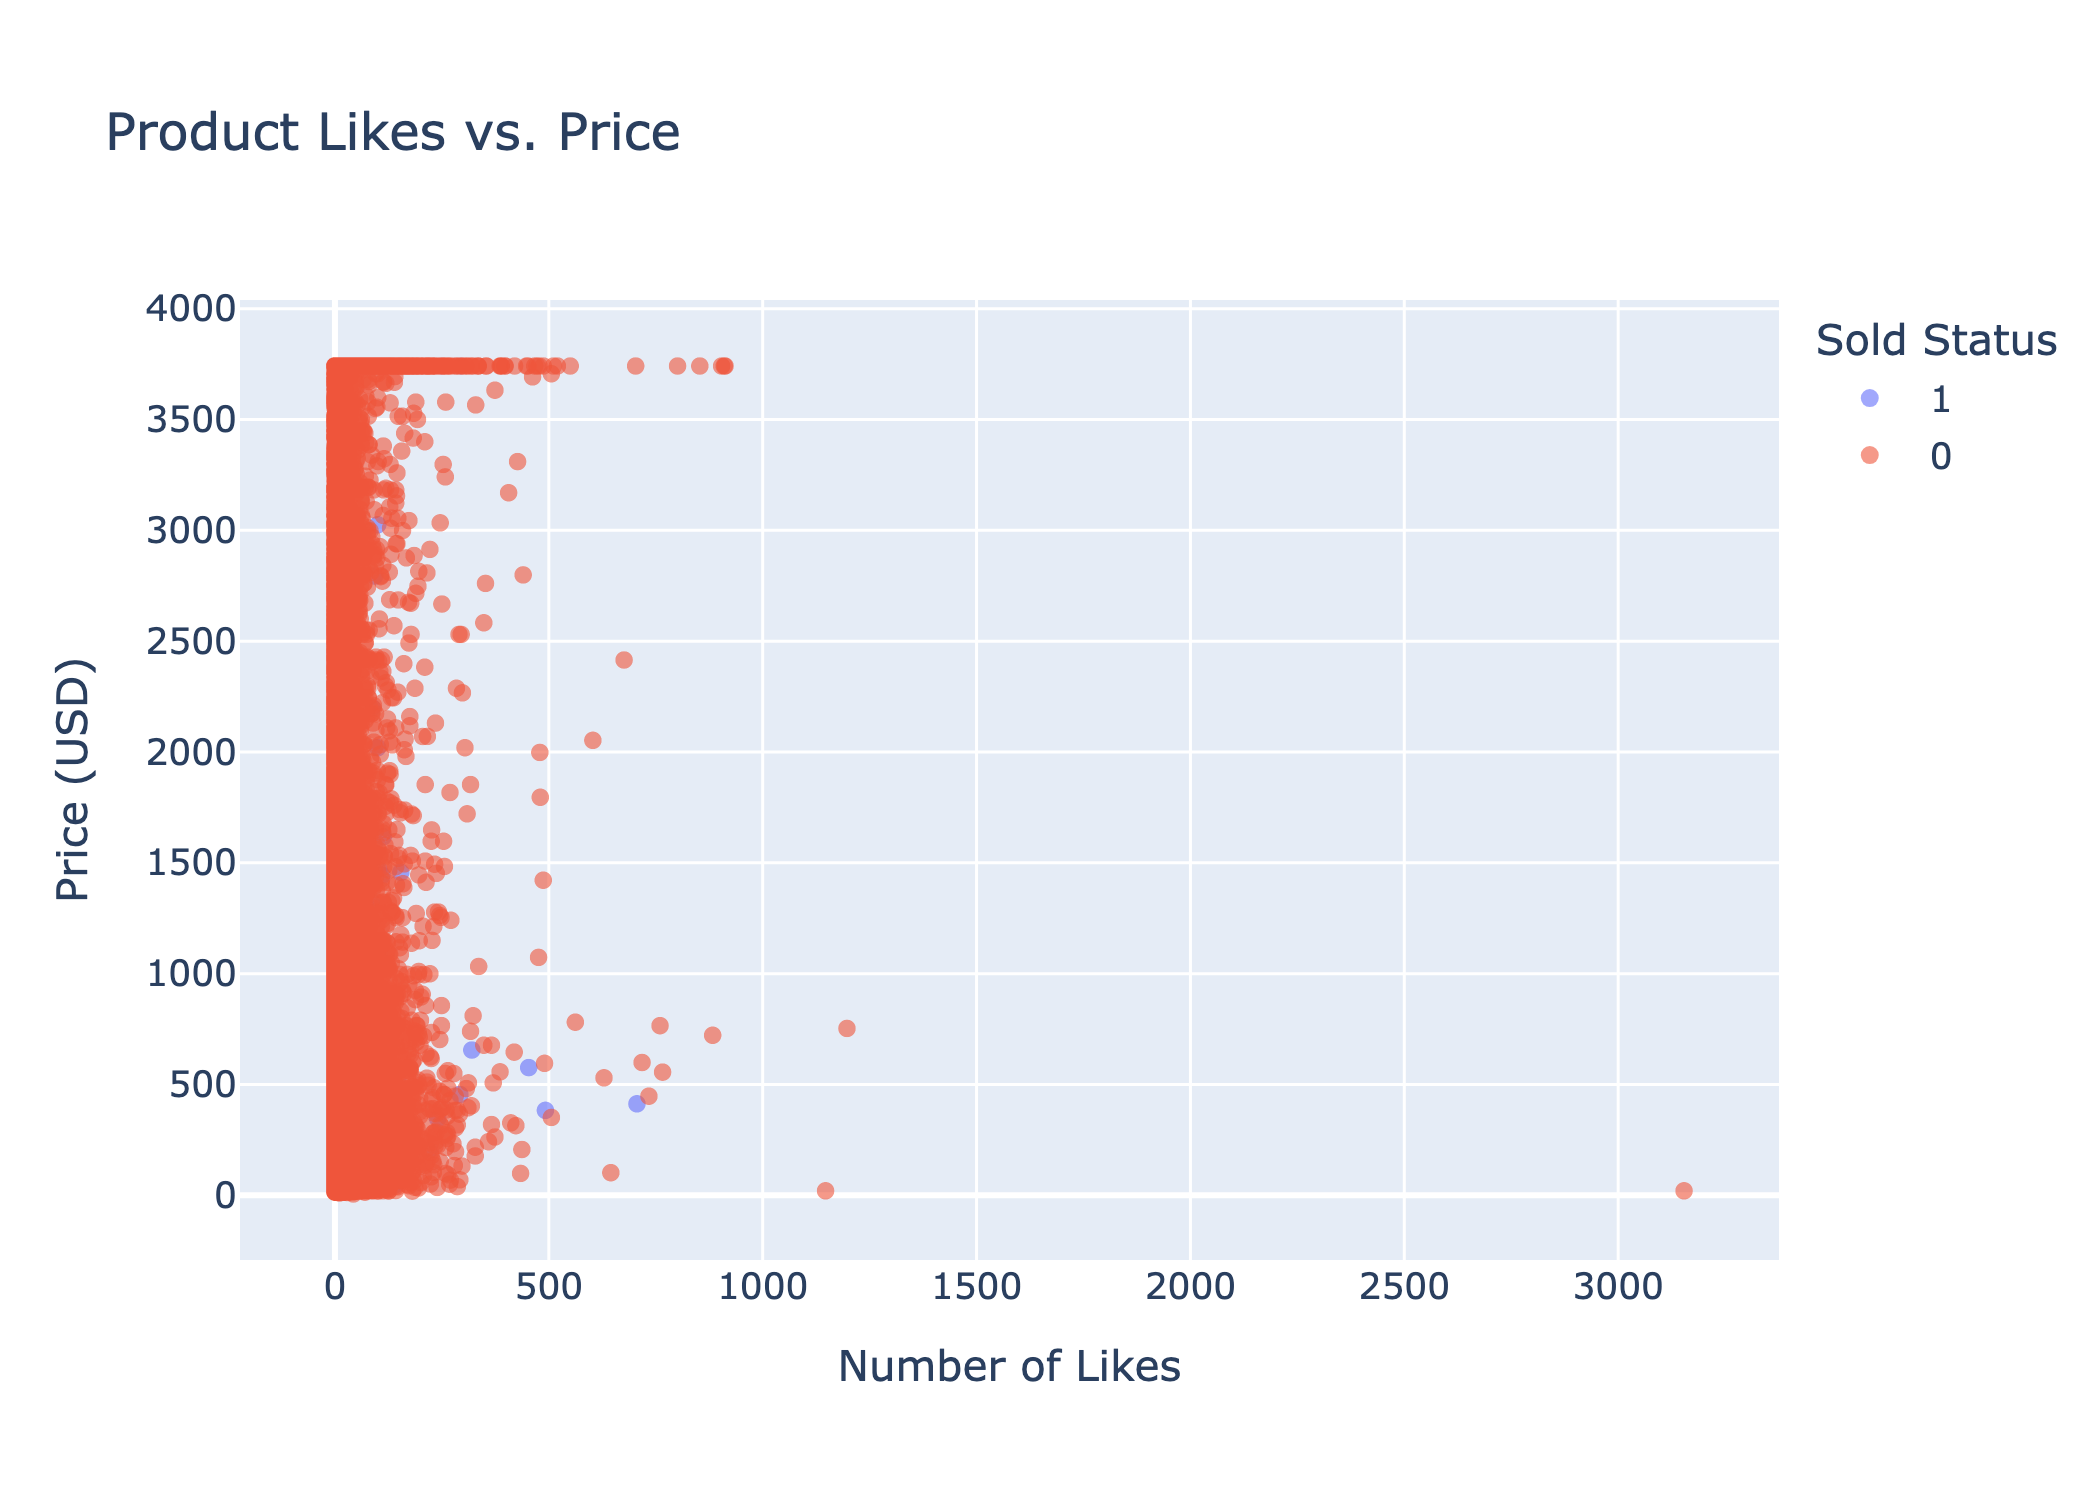

In [31]:
fig = px.scatter(df, x='product_like_count', y='price_usd', 
                 color=df['sold'].astype(str), 
                 title='Product Likes vs. Price',
                 labels={'product_like_count': 'Number of Likes', 'price_usd': 'Price (USD)', 'color': 'Sold Status'},
                 opacity=0.6)
fig.update(layout_coloraxis_showscale=False)

img_bytes = fig.to_image(format="png", scale=3)
Image(img_bytes)

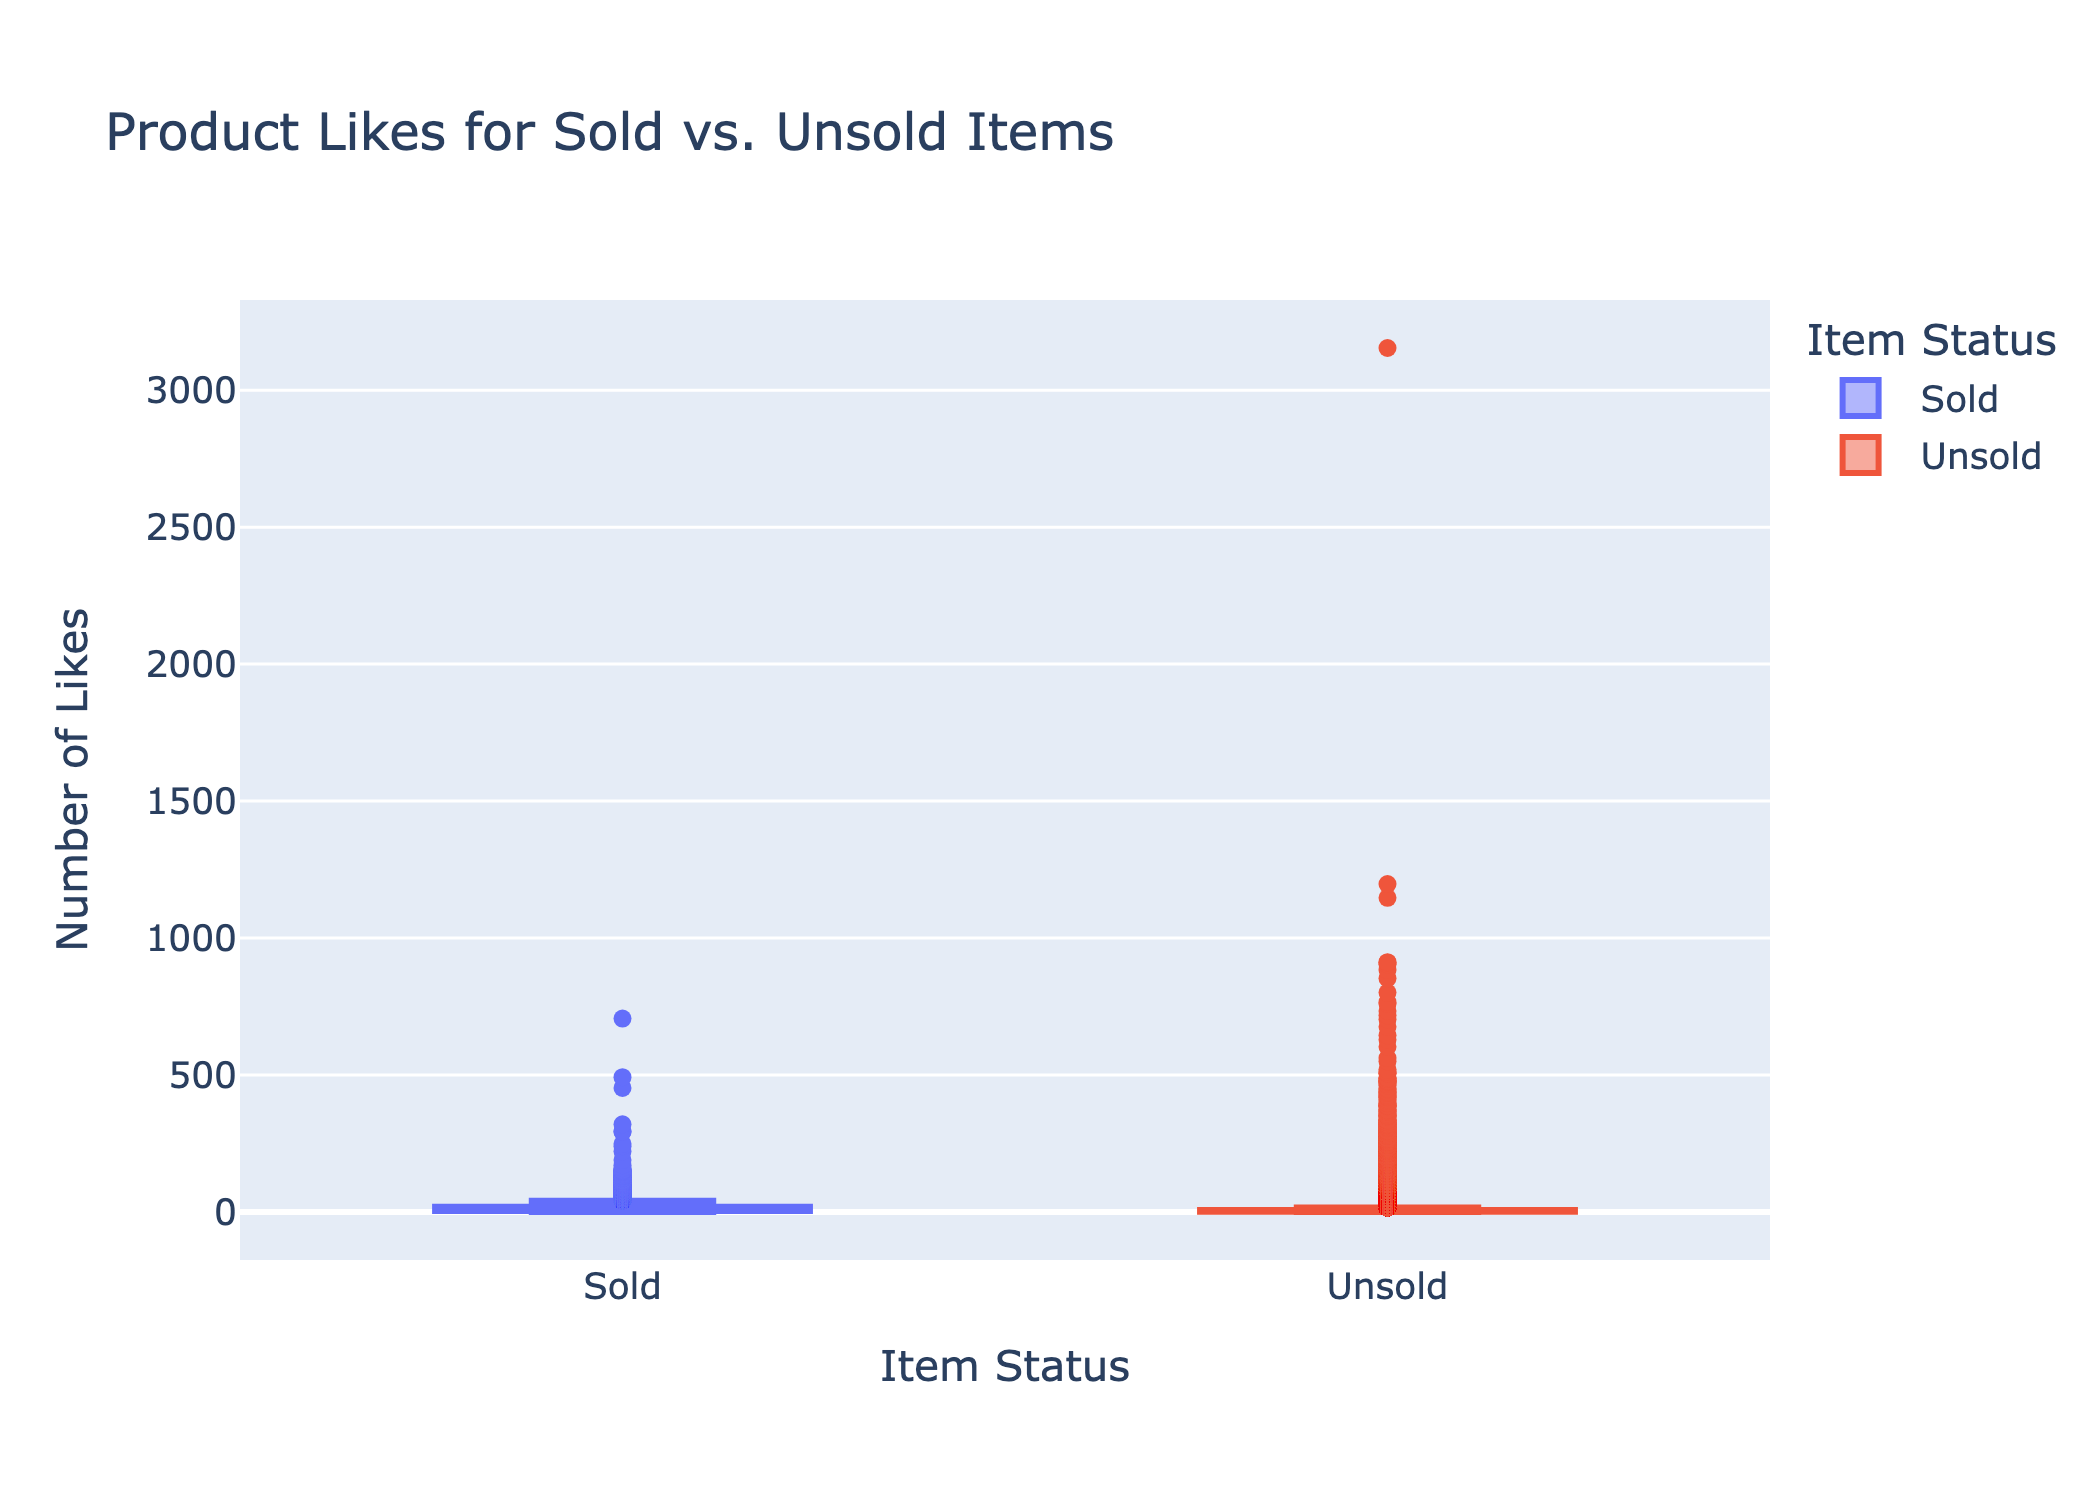

In [32]:
df['Sold Status'] = df['sold'].map({1: 'Sold', 0: 'Unsold'})
fig = px.box(df, x='Sold Status', y='product_like_count', 
             color='Sold Status',
             title='Product Likes for Sold vs. Unsold Items',
             labels={'Sold Status': 'Item Status', 'product_like_count': 'Number of Likes'})

img_bytes = fig.to_image(format="png", scale=3)
Image(img_bytes)

### **Part 3: Key Insights & Predictions**

This section synthesizes the EDA findings into a compelling narrative for stakeholders.

*   **Insight 1: The Pricing "Sweet Spot":** There is a specific price range where products have the highest likelihood of selling. Products priced significantly above or below this range tend to stagnate.

*   **Insight 2: Condition is Non-Negotiable:** Products in "Very Good" or "Like New" condition not only sell for higher prices but also have a dramatically higher sell-through rate. Condition is a key driver of both value and velocity.

*   **Insight 3: Trust Sells:** Sellers with "Trusted" or "Expert" badges consistently outperform others. This demonstrates that buyer confidence in the seller is a critical factor in the purchasing decision.

*   **Insight 4: Hero Products & Categories:** Handbags and small leather goods remain the most popular and fastest-selling categories. Classic materials like leather are more sought-after than seasonal or trendy materials.

*   **Insight 5: Likes Signal Intent:** A higher number of "likes" on a product is a strong positive indicator of its probability of being sold, making it a valuable metric for demand forecasting.

### **Part 4: Actionable Recommendations for Gucci Stakeholders**

Translate insights into concrete, data-driven business strategies.

*   **1. Implement a Dynamic Pricing Guide for Sellers:**
    *   **Recommendation:** Develop an automated tool that suggests an optimal price range to sellers during the listing process.
    *   **Justification:** This addresses **Insight 1**. It will help sellers price competitively, increasing their sell-through rate and boosting platform-wide sales velocity. The tool should use the product's category, condition, and material as inputs.

*   **2. Refine Inventory Sourcing and Promotion:**
    *   **Recommendation:** Actively encourage sellers to list items in high-demand categories (Handbags, Shoes) and pristine condition. Offer reduced commission fees or promotional visibility for these items.
    *   **Justification:** This leverages **Insights 2 & 4**. It ensures a steady supply of what customers want most, improving the overall attractiveness of the platform.

*   **3. Launch a "Premier Seller" Program:**
    *   **Recommendation:** Create a tiered program that rewards sellers who maintain a high sell-through rate, high pass rate, and positive community feedback. Benefits could include lower fees, priority support, and a "Premier Seller" badge.
    *   **Justification:** Based on **Insight 3**, this fosters a community of high-quality sellers, which in turn builds buyer trust and encourages repeat purchases.

*   **4. Leverage Engagement Metrics for Marketing:**
    *   **Recommendation:** Automate marketing campaigns based on engagement. For example, automatically feature products with a high number of "likes" in a "Trending Now" section on the homepage or in targeted emails.
    *   **Justification:** This capitalizes on **Insight 5**. It uses social proof to create urgency and drive conversions for items that have already demonstrated popular appeal.

### **Part 5: Predictive Modeling Suggestions**

Propose advanced analytical models to further enhance business intelligence and automate decision-making.

*   **1. Sales Prediction Model (Classification):**
    *   **Objective:** Predict if a newly listed product will sell within 90 days.
    *   **Model:** Random Forest or XGBoost Classifier.
    *   **Features:** `price_usd`, `product_category`, `product_condition`, `seller_badge`, `seller_pass_rate`, `product_like_count`, `product_material`.
    *   **Business Value:** Can identify "at-risk" listings that are unlikely to sell, allowing for proactive interventions like recommending a price drop to the seller.

*   **2. Optimal Price Recommender (Regression):**
    *   **Objective:** Predict the ideal selling price of an item to maximize both profit and speed of sale.
    *   **Model:** Gradient Boosting Regressor.
    *   **Features:** `product_category`, `product_condition`, `product_material`, `brand_name`. The model would be trained on the prices of items that have successfully sold.
    *   **Business Value:** This would be the engine powering the "Dynamic Pricing Guide" (Recommendation 1), providing data-driven, accurate price suggestions at scale.

*   **3. Seller Segmentation Model (Clustering):**
    *   **Objective:** Group sellers into distinct clusters (e.g., 'Power Sellers', 'Casual Sellers', 'Boutique Specialists').
    *   **Model:** K-Means Clustering.
    *   **Features:** `seller_products_sold`, `seller_num_products_listed`, average item price, sell-through rate.
    *   **Business Value:** Enables highly targeted communication and incentive programs for different seller types, maximizing their engagement and performance on the platform.